# Projekt „Startup Growth & Funding Trends“  

## Gruppenmitglieder  
- Tom Scheider 
- Mark Nolepa
- Lukas Trölenberg
- Silas Engel

## Kurz-Review des Datensatzes  
- Der Datensatz stammt von Kaggle und trägt den Titel **„Startup Growth & Funding Trends“**. 
- Er enthält Daten zu Startups, deren Wachstum und Finanzierungsrunden („funding rounds“) über verschiedene Jahre und Regionen hinweg.  
- Typische Merkmale sind: Branche, Finanzierungsbetrag, Datum der Runde, Investor(en) etc.
- Ziel: Trends im Startup-Ökosystem identifizieren – z. B. wie häufig Finanzierungsrunden stattfinden, wie groß die Beträge sind, welche Branchen und Regionen dominieren.

## Hyperlink zum Datensatz  
[Startup Growth & Funding Trends – Kaggle](https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends/data)

- Auf den Kaggle-Datensatz-Link gehen.
- Rechts oben auf „Download“ klicken und anschließend im Ordner entpacken.
- Optional über die Kaggle API: **kaggle datasets download < dataset-identifier >** im Terminal ausführen

## Unser Geschäftsziel  
- Wir möchten anhand des Datensatzes, **große Mengen an Startups  ressourcen effizient für Investoren bewerten, um möglichst profitable Investments zu indetifizieren** 
- Zudem wollen wir ein **Empfehlungsmodell** entwickeln, das Investoren **unterstützt** bei der Frage: *„In welche Start-ups mit hohem Wachstumspotenzial sollte ich investieren?“*  
- Langfristig zielt unser Projekt darauf ab, **Entscheidungshilfen für Gründer und Investoren** bereitzustellen und **Marktchancen frühzeitig zu erkennen**



## Installation und Importe
- Im folgenden werden alle **Module installiert**, welche Sie noch nicht bereits Installiert haben. 
- Anschließend werden alle erforderlichen **Programme importiert und der Datensatz eingelesen**, damit wir danach mit ihnen arbeiten können. 

In [1]:
import subprocess
import sys

# Methode, die überprüft, ob ein Modul installiert ist, und es bei Bedarf installiert.
# Methode wurde inspiriert durch: https://medium.com/@ryan_forrester_/fixing-no-module-named-error-in-python-3d5f79cbb44c
def installiere_Wenn_Modul_Fehlt(Modul: str):
    try:
        # versucht, das Modul zu importieren
        __import__(Modul)
    except ImportError:
        # falls das Modul nicht gefunden wird (ImportError), wird es installiert
        subprocess.check_call([sys.executable, "-m", "pip", "install", Modul])

# Installation der benötigten Module (falls sie fehlen)
installiere_Wenn_Modul_Fehlt("pandas")
installiere_Wenn_Modul_Fehlt("seaborn")
installiere_Wenn_Modul_Fehlt("matplotlib")
installiere_Wenn_Modul_Fehlt("numpy")
installiere_Wenn_Modul_Fehlt("plotly")
installiere_Wenn_Modul_Fehlt("scikit-learn")
installiere_Wenn_Modul_Fehlt("scipy")

print("Alle benötigten Module sind installiert.")

Alle benötigten Module sind installiert.


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("Der Import ist gelungen!")

Der Import ist gelungen!


In [3]:
df = pd.read_csv('startup_data.csv')  

print("Die benötigen Daten wurden geladen!")  

Die benötigen Daten wurden geladen!


## Informationen zum Datensatz

- Im folgenden wird zum Verständnis für das spätere Bearbeiten, die Datentypen deklariert und wichtige Kennzhahlen angegeben.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


# Startup growth & funding values

# Teil 1: Business Understanding & Datenexploration

## 1.1 Business Kontext

### Business Problem
*Erkennen potenzieller wachstumsstarkes Startup*:
- Unser Ziel ist es, mithilfe der verfügbaren Daten aus der CSV-Datei Unternehmen zu identifizieren, die ein besonders hohes Wachstumspotenzial aufweisen und sich somit für Investoren als besondern attraktiv darstellen.

**Risiko-Segmentierung**:
- Darüber hinaus möchten wir durch datenbasierte Analysen eine Risiko-Segmentierung vornehmen, um Start-ups anhand relevanter Faktoren in verschiedene Risikokategorien einzuteilen und so fundierte Investitionsentscheidungen zu unterstützen.

### Geschäftsfragen

- **Welche Kennzahlen beeinflussen die Profitabilität für Investoren?**
- **Wie gut kann ein datenbasiertes Modell Vorhersagen über die Profitabilität von Start-ups treffen?**


## Warum Data-Science?

###  Zielsetzung unserer Analyse

- Unsere Analyse verfolgt das Ziel, datenbasierte Entscheidungen im Bereich **Startup-Investitionen** zu unterstützen und psychologische Verzerrungen bei der Bewertung von Unternehmen zu reduzieren.  

###  Überblick über große Startup Mengen
Angesichts der Vielzahl an bestehenden und neu gegründeten Startups ist es für Investoren schwierig, den Überblick zu behalten. Durch den Einsatz datenanalytischer Methoden soll eine strukturierte und effiziente Übersicht über große Startup Mengen geschaffen werden.

###  Herausfiltern besonders relevanter Startups
Ein zentrales Anliegen ist es, aus dieser großen Menge **besonders relevante und vielversprechende Start-ups** zu identifizieren – also jene Unternehmen, die überdurchschnittliches Wachstumspotenzial oder einzigartige Marktchancen bieten.

###  Reduktion von subjektiven Verzerrungen
Traditionelle Investitionsentscheidungen sind oft von **Bauchgefühl** und **kognitiven Verzerrungen (Biases)** beeinflusst. Zu den häufigsten zählen:
- **Confirmation Bias:** Die Tendenz, Informationen so zu interpretieren, dass sie bestehende Überzeugungen bestätigen.  
- **Halo-Effekt:** Die Neigung, ein Unternehmen aufgrund einzelner positiver Merkmale insgesamt zu überschätzen.  
- **Recency Bias:** Jüngste Ereignisse werden überbewertet, während ältere, aber relevante Informationen vernachlässigt werden.  

###  Datenbasierte Investitionsentscheidungen
Durch die Analyse von Startup-Daten (z. B. Finanzierungsrunden, Branchenzugehörigkeit, Wachstumstrends) soll eine **objektive und nachvollziehbare Entscheidungsgrundlage** geschaffen werden.  
Dies ermöglicht Investoren, Chancen und Risiken faktenbasiert zu bewerten und die Wahrscheinlichkeit erfolgreicher Investments zu erhöhen.


## 1.2 Explorative Datenanalyse

### Daten-Visualisierung


### Graph V1

###  Vergleich der Umsätze profitabler und unprofitabler Startups

Der folgende Boxplot visualisiert die Verteilung des **Umsatzes (Revenue in Mio. USD)** zwischen profitablen und unprofitablen Start-ups.  
Durch diese Darstellung können wir auf einen Blick erkennen, wie stark sich die Umsatzstrukturen zwischen beiden Gruppen unterscheiden.

###  Zweck der Visualisierung
- Der **Boxplot** zeigt Median, Quartile und mögliche Ausreißer der Umsatzverteilung für die Kategorien Profitabel und Unprofitabel.  
- Zusätzlich sind die **durchschnittlichen Umsatzwerte** oberhalb der Boxen markiert, um einen schnellen quantitativen Vergleich zu ermöglichen.  
- Diese Visualisierung hilft uns zu verstehen, **ob ein klarer Zusammenhang zwischen Profitabilität und Umsatzhöhe besteht**, und liefert somit wertvolle Hinweise auf die Wachstums- und Erfolgsfaktoren von Start-ups.


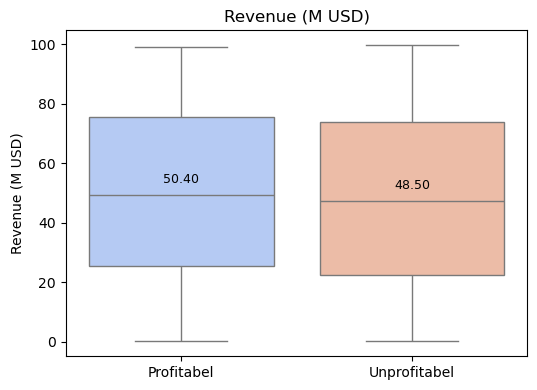

In [5]:
metrics = ["Revenue (M USD)"]
order = [1, 0]
labels = ["Profitabel", "Unprofitabel"]

plt.figure(figsize=(15, 4))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    ax = sns.boxplot(x="Profitable", y=metric, data=df, palette="coolwarm", order=order)
    ax.set_xticklabels(labels)
    ax.set_xlabel("")
    plt.title(f"{metric}")

    for j, prof_value in enumerate(order):
        mean_val = df[df["Profitable"] == prof_value][metric].mean()
        ax.text(j, mean_val + (df[metric].max() * 0.03), f"{mean_val:.2f}", 
                ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

- Die Visualisierung zeigt, dass profitable und unprofitable Startups beim Umsatz ein sehr ähnliches Niveau erreichen, wobei profitable Unternehmen im Durchschnitt nur leicht höher liegen. Insgesamt deutet dies darauf hin, dass Umsatz allein kein klarer Indikator für Profitabilität ist.

### Graph V2

### Verteilung Anzahl der Startups nach Industrie 

Die Darstellung zeigt, wie viele Start-ups aus den verschiedenen Branchen kommen, sodass sofort erkennbar ist, welche Industrie am stärksten vertreten ist. Sie ist interessant, weil sie Hinweise darauf gibt, wo die größte Gründungsaktivität stattfindet und welche Branchen möglicherweise besonders attraktiv oder wachstumsorientiert sind.


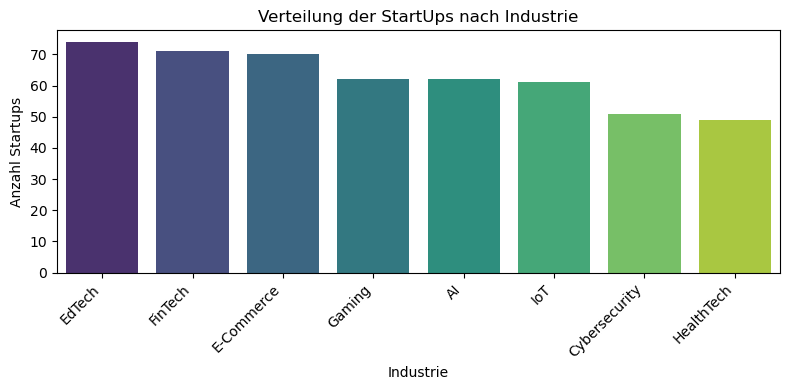

In [6]:
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
plt.ylabel("Anzahl Startups")
plt.xlabel("Industrie")
plt.title("Verteilung der StartUps nach Industrie")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_industry = industry_counts.index[0]
top_count = industry_counts.iloc[0]

- Wie man im Balkendiagramm gut erkennen kann, stammen mit 74 Unternehmen die meisten Startups aus der EdTech-Branche. Allerdings unterscheiden sich die übrigen Branchen in ihrer Anzahl nicht besonders stark, sodass die Verteilung insgesamt relativ ausgeglichen bleibt.

### Graph V3

### Verteilung der Startups nach Region

Das Kreisdiagramm zeigt, wie sich die Startups prozentual auf verschiedene Regionen verteilen, sodass sofort sichtbar wird, welche Region den größten Anteil an Gründungen hat. Es ist interessant, weil es auf einen Blick zeigt, in welchen geografischen Märkten die Startup-Aktivität am stärksten konzentriert ist.

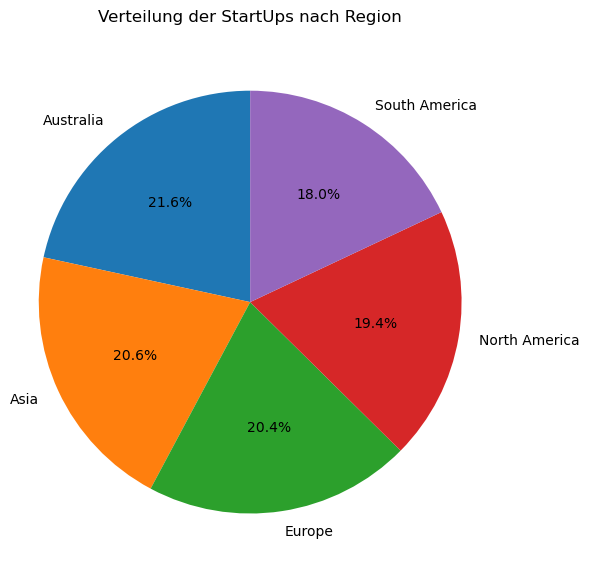

In [7]:
region_counts = df['Region'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(6,6)) 
plt.pie( region_counts.values, labels=region_counts.index, autopct="%1.1f%%", startangle=90 ) 
plt.title("Verteilung der StartUps nach Region") 
plt.axis("equal") 
plt.tight_layout()
plt.show()
top_region = region_counts.index[0] 
top_count = region_counts.iloc[0] 
share = top_count / region_counts.sum() * 100 


- Die Visualisierung zeigt, dass sich die Anzahl der Startups relativ gleichmäßig über die Regionen verteilt, wobei Australien mit rund 21,6 % leicht vorne liegt. Insgesamt deuten die geringen Unterschiede zwischen den Anteilen darauf hin, dass keine Region deutlich dominiert und das Startup-Ökosystem global breit gestreut ist.

### Graph V4

### Marktanteilanalyse

Im folgenden Analysieren wir in welchem Verhältnis die Startups zu einander stehen. Als Parameter nutzen wir hier Einnahmen, Bewertung und den Marktanteil der Unternehmen innerhalb einer Branche. Wichtig zu erwähnen ist, dass wir hierbei nur die 70 größten Unternehmen (gemessen an der Bewertung) anschauen, sodass es übersichtlicher bleibt. Auch wenn dadurch die volle Aussagekraft des Charts genommen wird, veranschaulicht es dennoch gut einige Trends welche sich ebenfalls durch die Gesamtheit der sich im Datensatz befindenden Unternehmen zieht.


In [8]:
eff_df["Industry Total Revenue"] = eff_df.groupby("Industry")["Revenue (M USD)"].transform("sum")
eff_df["Industry Market Share (%)"] = (eff_df["Revenue (M USD)"] / eff_df["Industry Total Revenue"]) * 100

# Top 30 nach Bewertung, nur mit Umsatz > 0
top70 = eff_df.nlargest(70, "Valuation (M USD)")
top70 = top70[top70["Revenue (M USD)"] > 0]

# Größen-Skalierung für Bubble-Chart
sizes = top70["Industry Market Share (%)"]
sizeref = 2.0 * sizes.max() / (60.0 ** 2)  # size_max=60

fig = px.scatter(
    top70,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Industry Market Share (%)",  # Bubble-Größe = Marktanteil
    color="Industry",
    hover_name="Startup Name",
    hover_data={"Industry Market Share (%)": True, "Revenue (M USD)": True, "Valuation (M USD)": True},
    log_x=True,
    size_max=60,
    title="Top 70 Startups nach Bewertung (Bubble Chart, Größe = Marktanteil im Wirtschaftszweig)"
)
fig.update_traces(marker=dict(sizeref=sizeref, sizemin=4))
fig.show()

NameError: name 'eff_df' is not defined

- Wie gut zu erkennen ist, erzielen die meisten Unternehmen Einnahmen zwischen 60 und 90 Mio. USD. Ihre Bewertungen unterscheiden sich jedoch deutlich. Aus Investorensicht sind jene Unternehmen am attraktivsten, die im Diagramm möglichst weit unten rechts liegen und einen großen Kreisradius aufweisen. Das bedeutet, dass sie hohe Einnahmen, eine vergleichsweise geringe Bewertung sowie einen großen Marktanteil in ihrer Branche besitzen. All das können potenzielle Gründe sein, die für oder gegen eine Investition sprechen.

### Graph V5

### Wo entsteht am meisten Umsatz pro investieretem USD?

In dieser nun etwas komplexeren Analyse wird berechnet, wie effizient Startups ihr erhaltenes Funding in Umsatz umwandeln, indem der Umsatz pro investiertem USD ausgewertet wird. Die Ergebnisse nach Branchen, Regionen und einzelnen Startups ermöglichen einen schnellen Überblick darüber, wo Kapital am wirkungsvollsten eingesetzt wird.


Umsatz-Effizienz (Revenue / Funding) nach Branche (höher = mehr Umsatz pro investiertem USD):
               Mean_Ratio  Median_Ratio  Count
Industry                                      
HealthTech          3.811         0.378     49
Gaming              2.248         0.304     62
FinTech             1.099         0.294     71
IoT                 0.932         0.290     61
EdTech              0.894         0.325     74
AI                  0.756         0.334     62
E-Commerce          0.620         0.339     70
Cybersecurity       0.562         0.347     51

Umsatz-Effizienz nach Region:
               Mean_Ratio  Median_Ratio  Count
Region                                        
Europe              2.074         0.366    102
South America       1.349         0.300     90
Australia           1.047         0.336    108
North America       1.010         0.296     97
Asia                0.991         0.296    103

Top 10 Startups nach Umsatz-Effizienz:
    Startup Name    Industry        

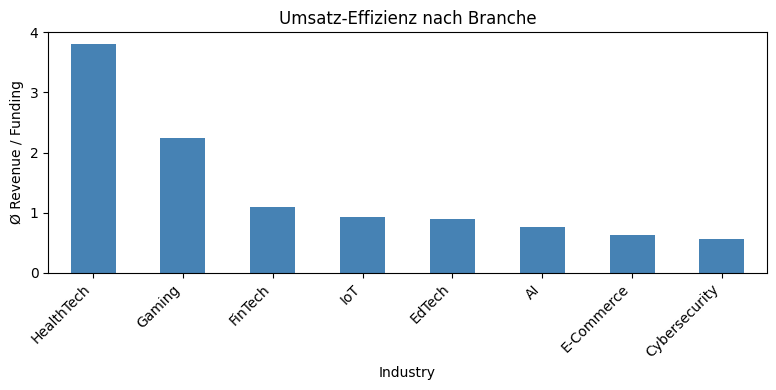

In [ ]:
eff_df = df.assign(
    Revenue_per_Invested_USD=df['Revenue (M USD)'] / df['Funding Amount (M USD)']
)

# Aggregation nach Branche und Region
eff_industry = (
    eff_df.groupby('Industry')
    .agg(Mean_Ratio=('Revenue_per_Invested_USD', 'mean'),
         Median_Ratio=('Revenue_per_Invested_USD', 'median'),
         Count=('Revenue_per_Invested_USD', 'size'))
    .sort_values('Mean_Ratio', ascending=False)
    .round(3)
)

eff_region = (
    eff_df.groupby('Region')
    .agg(Mean_Ratio=('Revenue_per_Invested_USD', 'mean'),
         Median_Ratio=('Revenue_per_Invested_USD', 'median'),
         Count=('Revenue_per_Invested_USD', 'size'))
    .sort_values('Mean_Ratio', ascending=False)
    .round(3)
)

# Top 10 einzelne Startups nach Effizienz
top_startups = (
    eff_df[['Startup Name','Industry','Region','Funding Amount (M USD)','Revenue (M USD)','Revenue_per_Invested_USD']]
    .sort_values('Revenue_per_Invested_USD', ascending=False)
    .head(10)
    .round(3)
)

print("Umsatz-Effizienz (Revenue / Funding) nach Branche (höher = mehr Umsatz pro investiertem USD):")
print(eff_industry)
print("\nUmsatz-Effizienz nach Region:")
print(eff_region)
print("\nTop 10 Startups nach Umsatz-Effizienz:")
print(top_startups)

best_industry = eff_industry.index[0]
best_industry_value = eff_industry.iloc[0]['Mean_Ratio']
best_region = eff_region.index[0]
best_region_value = eff_region.iloc[0]['Mean_Ratio']

#Einfache Visualisierung nach Branche
plt.figure(figsize=(8,4))
eff_industry['Mean_Ratio'].plot(kind='bar', color='steelblue')
plt.ylabel('Ø Revenue / Funding')
plt.title('Umsatz-Effizienz nach Branche')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Die Auswertung zeigt, dass HealthTech mit großem Abstand die höchste Umsatz-Effizienz erzielt und damit den meisten Umsatz pro investiertem US-Dollar generiert. Auch regional hebt sich Europa leicht als effizienteste Region hervor. Insgesamt wird deutlich, dass sowohl Branchen- als auch Standortwahl einen spürbaren Einfluss auf die Kapitalrendite von Startups haben.

### Potentielle Verzerrungen (Biases) im Datensatz

Bei der Analyse von Startup-Daten ist es wichtig, sich der Grenzen und möglichen Verzerrungen bewusst zu sein, die sowohl in der Datenerhebung als auch in der Zusammensetzung des Datensatzes liegen können. Im Folgenden diskutieren wir einige zentrale Aspekte, die die Aussagekraft unserer Ergebnisse beeinflussen könnten.

**Eingeschränkte Stichprobengröße:**

 Unser Datensatz umfasst eine vergleichsweise begrenzte Anzahl von Unternehmen. Bei einer kleineren Stichprobe besteht das Risiko, dass einzelne Ausreißer oder besonders erfolgreiche Startups die statistischen Kennzahlen unverhältnismäßig stark beeinflussen. So kann beispielsweise ein einzelner Ausreißer mit extrem hoher Bewertung oder Umsatz die durchschnittliche Profitabilität der gesamten Stichprobe künstlich nach oben ziehen, obwohl die Mehrheit der Unternehmen deutlich moderatere Werte aufweist. Dies führt dazu, dass Durchschnittswerte möglicherweise nicht das typische Start-up repräsentieren.

**Survivorship Bias:**

 Ein klassisches Problem in Start-up-Datensätzen ist der Survivorship Bias. Oft werden nur Unternehmen erfasst, die eine gewisse Phase überlebt haben oder bereits Finanzierungsrunden abgeschlossen haben. Gescheiterte Startups oder solche, die sich noch in sehr frühen Phasen befinden, sind unterrepräsentiert oder fehlen gänzlich. Dies kann zu einer systematischen Überschätzung der Erfolgswahrscheinlichkeit führen, da das Bild verzerrt wird: Wir sehen hauptsächlich die „Gewinner" oder zumindest die Unternehmen, die lange genug bestanden haben, um in die Datenbank aufgenommen zu werden.

**Regionale und branchenspezifische Verzerrungen:** 

Die Verteilung der Startups über Regionen und Branchen ist selten gleichmäßig. Bestimmte Regionen (z. B. etablierte Tech-Hubs) oder Branchen (z. B. FinTech, EdTech) können überrepräsentiert sein, während andere Märkte oder Sektoren unterrepräsentiert bleiben. Ergebnisse, die aus solchen Daten abgeleitet werden, sind möglicherweise nicht ohne Weiteres auf andere geografische oder sektorale Kontexte übertragbar. Parameter wie **Region** und **Industry** könnten somit systematisch verzerrt sein, wenn die Stichprobe nicht die globale oder sektorübergreifende Vielfalt zeigt.

**Zeitliche Verzerrungen durch unterschiedliche Gründungsjahre:** 

Startups in unserem Datensatz wurden über verschiedene Jahre hinweg gegründet. Unternehmen, die beispielsweise in wirtschaftlich günstigen Phasen entstanden sind, hatten möglicherweise bessere Finanzierungsbedingungen und Wachstumschancen als solche, die in Krisenzeiten gegründet wurden. Der Parameter **Year Founded** kann daher eine Quelle für Verzerrungen sein, da ökonomische Bedingungen, Markttrends und technologische Entwicklungen im Laufe der Zeit stark variieren. Ein direkter Vergleich von Startups unterschiedlicher Gruppen, ohne diese zeitlichen Effekte zu berücksichtigen, kann zu irreführenden Schlussfolgerungen führen.

**Konzentration von Erfolg auf die wenigen Guten:** 

In der Start-up-Welt ist eine starke Schiefe der Erfolgsverteilung üblich. Einige wenige äußerst erfolgreiche Unternehmen generieren den Großteil des Gesamtumsatzes oder der Gesamtbewertung, während viele andere Startups nur bescheidene Ergebnisse erzielen. Diese „Winner-takes-all"-Dynamik bedeutet, dass Kennzahlen wie **Valuation** oder **Revenue** stark von Ausreißern geprägt sein können. Dadurch werden Mittelwerte wenig aussagekräftig, und Medianwerte bieten oft ein realistischeres Bild der „typischen" Performance.

**Unvollständige Informationen zu qualitativen Erfolgsfaktoren:** 

Datengetriebene Analysen konzentrieren sich naturgemäß auf quantifizierbare Merkmale wie Finanzierungsbeträge, Mitarbeiterzahlen oder Umsätze. Qualitative Aspekte, wie etwa die Kompetenz des Gründerteams, die Qualität des Geschäftsmodells, Netzwerkeffekte oder die Innovationskraft, lassen sich nur schwer in Zahlen fassen. Parameter wie **Funding Amount** oder **Market Share** bieten zwar wichtige Hinweise, erfassen aber nicht die vollständige Komplexität dessen, was ein Startup erfolgreich macht. Verzerrungen würden entstehen, wenn wir implizit annehmen, dass die erfassten Variablen alle relevanten Erfolgsmerkmale abbilden.

**Definitionsabhängigkeit von Profitabilität:** 

Der Parameter **Profitable** ist stark von der zugrunde liegenden Definition abhängig. Was als „profitabel" gilt, kann unterschiedlich ausgelegt werden (z. B. operativer Gewinn, Nettogewinn nach Steuern, EBITDA). Unterschiedliche Definitionen führen zu unterschiedlichen Klassifikationen und ohne klare Dokumentation der verwendeten Kriterien besteht die Gefahr, dass Ergebnisse verzerrt oder nicht vergleichbar sind.

**Fazit:** 

Die Interpretation der Analyseergebnisse sollte stets vor dem Hintergrund dieser potenziellen Verzerrungen erfolgen. Eine begrenzte Stichprobengröße, das Fehlen gescheiterter Unternehmen, regionale und branchenspezifische Ungleichgewichte, zeitliche Effekte, die Dominanz weniger "Gewinner" sowie die Reduktion komplexer Erfolgsmerkmale auf quantitative Kennzahlen schränken die Generalisierbarkeit und Aussagekraft der Ergebnisse ein.

## 1.3 Statistische Analyse

### 1.3.1 Relevante Statistiken

In [ ]:
df.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


### Wie effienzient wird Personal skaliert?

Diese Visualisierung veranschaulicht, wie viel Umsatz Startups pro Mitarbeiter erwirtschaften und vergleicht diese Effizienz zwischen Branchen, Regionen und den Top-Startups selbst. Das ist interessant, weil es sichtbar macht, welche Faktoren – wie Teamgröße, Finanzierung oder Bewertung – mit hoher Produktivität pro Mitarbeiter zusammenhängen und wo besonders leistungsstarke Unternehmen sitzen.

➤ Umsatz-Effizienz (Revenue pro Mitarbeiter) nach Branche:
               Mean_Rev_per_Emp  Median_Rev_per_Emp  Count
Industry                                                  
Cybersecurity             0.105               0.021     51
HealthTech                0.060               0.019     49
E-Commerce                0.052               0.024     70
AI                        0.045               0.024     62
Gaming                    0.041               0.020     62
FinTech                   0.039               0.020     71
EdTech                    0.033               0.018     74
IoT                       0.027               0.014     61

➤ Umsatz-Effizienz nach Region:
               Mean_Rev_per_Emp  Median_Rev_per_Emp  Count
Region                                                    
Asia                      0.092               0.022    103
North America             0.043               0.021     97
Australia                 0.043               0.018    108
Europe                 

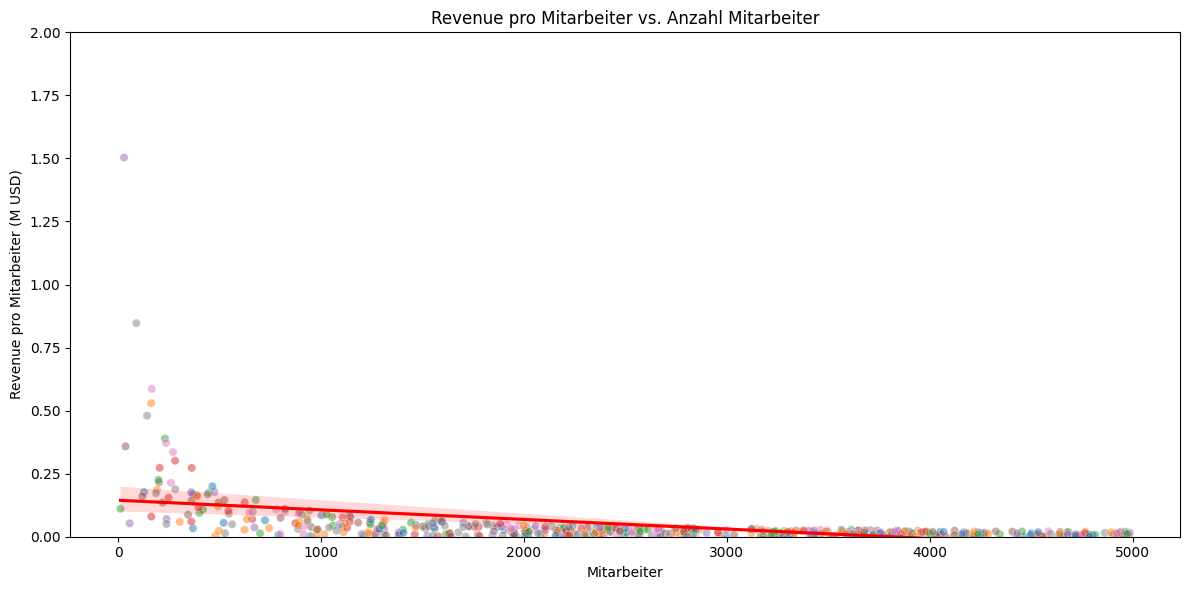

In [ ]:
base_df = eff_df.copy() if 'eff_df' in globals() else df.copy()

work_emp = base_df.copy()
work_emp['Employees_nonzero'] = work_emp['Employees'].replace(0, np.nan)
work_emp['Revenue_per_Employee'] = work_emp['Revenue (M USD)'] / work_emp['Employees_nonzero']

# Aggregation nach Branche und Region
agg_industry = (
    work_emp.groupby('Industry')
    .agg(
        Mean_Rev_per_Emp=('Revenue_per_Employee', 'mean'),
        Median_Rev_per_Emp=('Revenue_per_Employee', 'median'),
        Count=('Revenue_per_Employee', 'size')
    )
    .sort_values('Mean_Rev_per_Emp', ascending=False)
    .round(3)
)

agg_region = (
    work_emp.groupby('Region')
    .agg(
        Mean_Rev_per_Emp=('Revenue_per_Employee', 'mean'),
        Median_Rev_per_Emp=('Revenue_per_Employee', 'median'),
        Count=('Revenue_per_Employee', 'size')
    )
    .sort_values('Mean_Rev_per_Emp', ascending=False)
    .round(3)
)

top_startups_emp = (
    work_emp[['Startup Name','Industry','Region','Employees','Revenue (M USD)','Revenue_per_Employee']]
    .sort_values('Revenue_per_Employee', ascending=False)
    .head(10)
    .round(3)
)

print("➤ Umsatz-Effizienz (Revenue pro Mitarbeiter) nach Branche:")
print(agg_industry.head(10))
print("\n➤ Umsatz-Effizienz nach Region:")
print(agg_region)
print("\n➤ Top 10 Startups nach Revenue pro Mitarbeiter:")
print(top_startups_emp)

best_ind = agg_industry.index[0]
best_ind_val = agg_industry.iloc[0]['Mean_Rev_per_Emp']
best_reg = agg_region.index[0]
best_reg_val = agg_region.iloc[0]['Mean_Rev_per_Emp']

# Korrelationen (Spearman) mit Revenue_per_Employee
corr_vars = ['Employees','Funding Amount (M USD)','Valuation (M USD)','Revenue (M USD)','Profitable']
corr_df = work_emp[corr_vars + ['Revenue_per_Employee']].corr(method='spearman')['Revenue_per_Employee'].drop('Revenue_per_Employee').round(3)

print("\nSpearman-Korrelationen mit Revenue_per_Employee (positiv = steigt mit Kennzahl):")
print(corr_df)

print("\nAntwort 1.3:")
print(
    f"Die höchste durchschnittliche Umsatz-Effizienz (Revenue pro Mitarbeiter) liegt in der Branche '{best_ind}' (Ø {best_ind_val:.3f} M USD je Mitarbeiter) "
    f"und regional in '{best_reg}' (Ø {best_reg_val:.3f}). "
    "Korrelationen zeigen, ob größere Teams oder höhere Bewertungen mit Effizienz zusammenhängen. "
    "Interpretation: "
    + ("Mehr Mitarbeiter senken Effizienz. " if corr_df['Employees'] < 0 else "Mehr Mitarbeiter erhöhen Effizienz oder neutral. ")
    + ("Höhere Bewertung korreliert positiv. " if corr_df['Valuation (M USD)'] > 0 else "Bewertung zeigt keinen klar positiven Zusammenhang. ")
    + ("Höherer Gesamtumsatz setzt sich teils in Effizienz um. " if corr_df['Revenue (M USD)'] > 0 else "Gesamtumsatz steigert nicht zwingend Effizienz. ")
)

# Optionale Visualisierung
plt.figure(figsize=(12,6))
plt.ylim(0,2)
sns.scatterplot(data=work_emp, x='Employees', y='Revenue_per_Employee', hue='Industry', legend=False, alpha=0.5)
sns.regplot(data=work_emp, x='Employees', y='Revenue_per_Employee', scatter=False, color='red')
plt.title('Revenue pro Mitarbeiter vs. Anzahl Mitarbeiter')
plt.xlabel('Mitarbeiter')
plt.ylabel('Revenue pro Mitarbeiter (M USD)')
plt.tight_layout()
plt.show()

### Hebt ein höherer Marktanteil die Bewertung, Profitabilität und Kapital-Effizienz?

Diese Analyse untersucht, ob Unternehmen mit höherem Marktanteil auch erfolgreicher sind (gemessen an Bewertung, Kapitaleffizienz und Profitabilität). Das ist zentral für die Frage, ob Marktdominanz tatsächlich ein verlässlicher Indikator für wirtschaftlichen Erfolg ist oder ob andere Faktoren wichtiger sein könnten.

Spearman-Korrelationen mit Marktanteil (positiv = steigt mit Marktanteil):
Valuation (M USD)           0.106
Revenue_per_Invested_USD   -0.059
Profitable                  0.118
Name: Market Share (%), dtype: float64

Kennzahlen nach Marktanteils-Quartilen:
                      Ø_Bewertung  Ø_Kapital_Effizienz    n
Market Share Quartil                                       
Q1 (niedrig)             1218.201                1.503  126
Q2                       1333.876                0.908  124
Q3                       1389.514                1.394  125
Q4 (hoch)                1546.571                1.360  125

IPO-Profitabilitätsrate nach Marktanteils-Quartilen:
Market Share Quartil
Q1 (niedrig)    0.381
Q2              0.347
Q3              0.512
Q4 (hoch)       0.488
Name: Profitable, dtype: float64


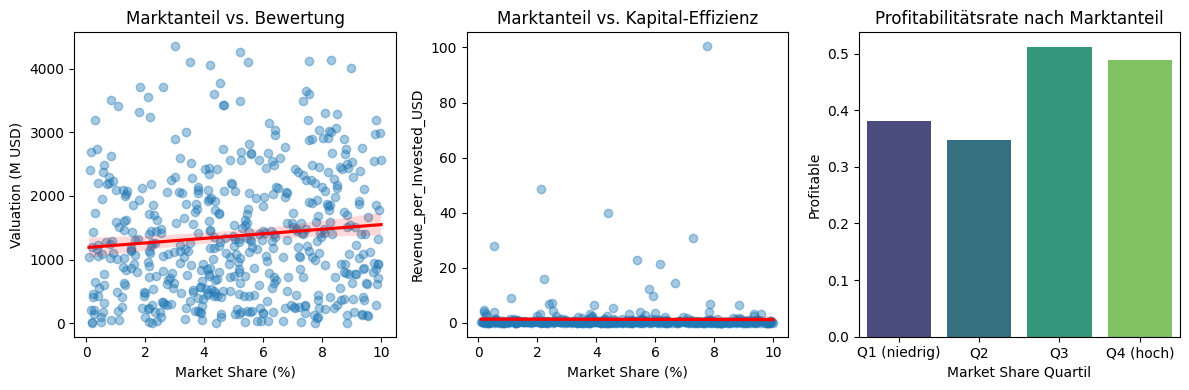


Antwort 1.4: Ein höherer Marktanteil korreliert positiv mit der Bewertung (0.106), negativ/neutral mit der Kapital-Effizienz (-0.059) und positiv mit der Profitabilität (0.118). Die Quartile stützen diesen Trend.


In [ ]:
work = eff_df.copy() if 'eff_df' in globals() else df.assign(
    Revenue_per_Invested_USD=df['Revenue (M USD)'] / df['Funding Amount (M USD)']
).copy()

# Korrelationen zwischen Marktanteil und Zielgrößen
corr = (
    work[['Market Share (%)', 'Valuation (M USD)', 'Revenue_per_Invested_USD', 'Profitable']]
    .corr(method='spearman')
    .loc['Market Share (%)']
    .drop('Market Share (%)')
    .round(3)
)

print("Spearman-Korrelationen mit Marktanteil (positiv = steigt mit Marktanteil):")
print(corr)

# Quartile des Marktanteils und aggregierte Metriken
work['Market Share Quartil'] = pd.qcut(
    work['Market Share (%)'], 4,
    labels=['Q1 (niedrig)', 'Q2', 'Q3', 'Q4 (hoch)'],
    duplicates='drop'
)

agg_ms = (
    work.groupby('Market Share Quartil')
    .agg(
        Ø_Bewertung=('Valuation (M USD)', 'mean'),
        Ø_Kapital_Effizienz=('Revenue_per_Invested_USD', 'mean'),
        n=('Market Share (%)', 'size')
    )
    .round(3)
)

print("\nKennzahlen nach Marktanteils-Quartilen:")
print(agg_ms)

# Separate Profitabilitätsrate je Quartil
prof_rate = (
    work.groupby('Market Share Quartil')['Profitable']
    .mean()
    .round(3)
)
print("\nIPO-Profitabilitätsrate nach Marktanteils-Quartilen:")
print(prof_rate)

# Kurze Visualisierung
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.regplot(data=work, x='Market Share (%)', y='Valuation (M USD)', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Marktanteil vs. Bewertung')

plt.subplot(1,3,2)
sns.regplot(data=work, x='Market Share (%)', y='Revenue_per_Invested_USD', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Marktanteil vs. Kapital-Effizienz')

plt.subplot(1,3,3)
sns.barplot(data=prof_rate.reset_index(), x='Market Share Quartil', y='Profitable', palette='viridis')
plt.title('Profitabilitätsrate nach Marktanteil')
plt.tight_layout()
plt.show()

# Fazit in einem Satz
trend_bew = "positiv" if corr['Valuation (M USD)'] > 0 else "negativ/neutral"
trend_eff = "positiv" if corr['Revenue_per_Invested_USD'] > 0 else "negativ/neutral"
trend_prof = "positiv" if corr['Profitable'] > 0 else "negativ/neutral"

print(
    f"\nAntwort 1.4: Ein höherer Marktanteil korreliert {trend_bew} mit der Bewertung "
    f"({corr['Valuation (M USD)']}), {trend_eff} mit der Kapital-Effizienz "
    f"({corr['Revenue_per_Invested_USD']}) und {trend_prof} mit der Profitabilität "
    f"({corr['Profitable']}). Die Quartile stützen diesen Trend."
)

### 1.3.2 Korrelationsmatrix und -analyse

#### Korrelationsmatrix

Die **Korrelationsmatrix** zeigt auf einer Skala von -1 bis 1, wie stark zwei verschiedene Kennzahlen miteinander korrelieren, also zusammenhängen. Wenn zwei Kennzahlen den Wert 0 erhalten, besteht keinerlei Korrelation zwischen ihnen. Bei negativen Werten besteht ein entgegengesetzter Zusammenhang, bei positiven Werten dementsprechend ein direkter Zusammenhang. 

Zu beachten ist, dass Korrelation nicht mit Kausalität gleichzusetzen ist. Kausalität bedeutet, dass ein Anstieg von Variable A der Grund für den Anstieg/Abfall von Variable B und ist und diese Variablen damit auch korrelieren. 

Ebenso kann Korrelation durch eine dritte Variable C entstehen, die bei beiden Variablen A und B für hohe/niedrige Werte sorgt und diese damit korrelieren. Zu beachten ist hier, dass die Kausalität dann von C ausgeht und nicht zwischen A und B besteht. 

Außerdem können Korrelationen auch durch "Zufälle" entstehen, bei denen die Variablen A und B aus unterschiedlichen Gründen ihre Werte annehmen und diese dennoch korrelieren. Dabei ist ein gutes Domänenwissen von enormer Wichtigkeit, da man so, gewisse "zufällige" Korrelationen schneller entdeckt und diese nicht weiter das Modell negativ beeinflussen.

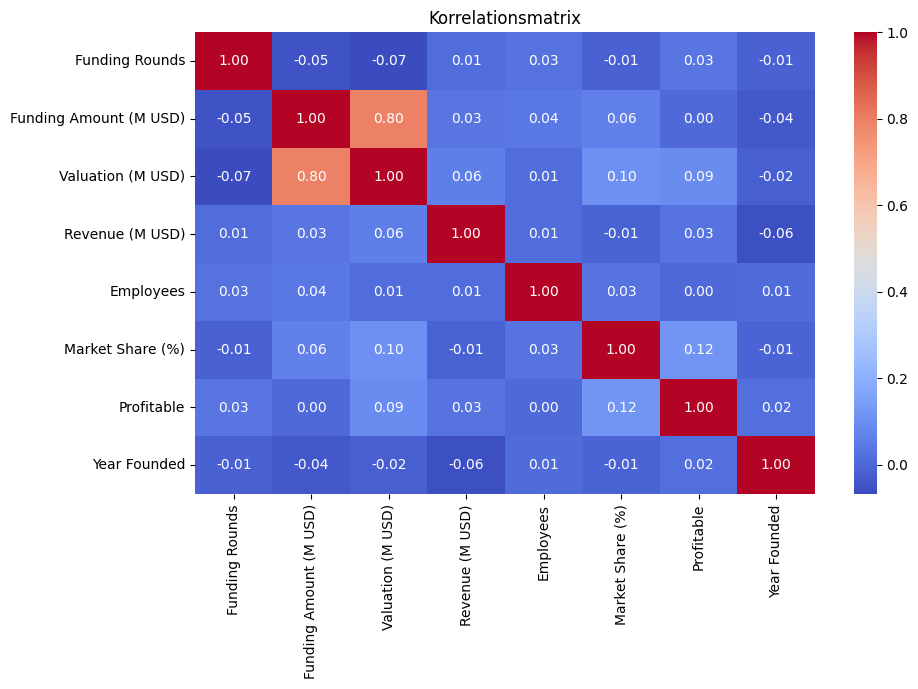

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

In [ ]:
from IPython.display import display

threshold = 0.088

try:
    # 1. Daten laden (verwende vorhandenen df aus Notebook)
    if 'df' not in globals():
        file_path = 'startup_data.csv'
        df = pd.read_csv(file_path)
    
    # 2. Korrelationsmatrix berechnen
    corr_matrix = df.corr(numeric_only=True)
    
    # 3. Matrix "entstapeln", um Zeilenpaare zu erhalten
    corr_pairs = corr_matrix.stack()
    corr_pairs = corr_pairs.rename_axis(['Variable_1', 'Variable_2'])
    corr_df = corr_pairs.reset_index(name='Correlation')
    
    # 4. Selbstkorrelationen entfernen
    corr_df = corr_df[corr_df['Variable_1'] != corr_df['Variable_2']]
    
    # 5. Doppelte Paare entfernen
    corr_df = corr_df[corr_df['Variable_1'] < corr_df['Variable_2']]
    
    # 6. Nach Signifikanz filtern (absoluter Wert > Schwelle)
    significant_corr = corr_df[corr_df['Correlation'].abs() > threshold].copy()
    
    # 7. Nach Stärke sortieren
    significant_corr['Abs_Correlation'] = significant_corr['Correlation'].abs()
    significant_corr = significant_corr.sort_values(by='Abs_Correlation', ascending=False)
    
    # 8. Ergebnis ausgeben
    print(f"--- Signifikante Korrelationspaare ( |r| > {threshold} ) ---")
    
    # ÄNDERUNG: 'display()' explizit aufrufen, um die Tabelle zu erzwingen
    display(significant_corr[['Variable_1', 'Variable_2', 'Correlation']])

except FileNotFoundError:
    print(f"FEHLER: Die Datei '{file_path}' wurde nicht gefunden.")
except ModuleNotFoundError:
    print("FEHLER: 'IPython.display' konnte nicht importiert werden.")
    print("Fallback zur Textausgabe:")
    print(significant_corr[['Variable_1', 'Variable_2', 'Correlation']].to_string(index=False))
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")

--- Signifikante Korrelationspaare ( |r| > 0.088 ) ---


,Variable_1,Variable_2,Correlation
10,Funding Amount (M USD),Valuation (M USD),0.795061
46,Market Share (%),Profitable,0.115842
42,Market Share (%),Valuation (M USD),0.103547
50,Profitable,Valuation (M USD),0.092499


#### Korrelationsanalyse

1. Zunächst müssen die wichtigsten Werte aus der Matrix gefiltert werden. Aufgrund der Symmetrie reicht es aus, die Werte überhalb der Diagonale genauer anzugucken. In der Folge geht man typischerweise vom Korrelationskoeffizienten nach Pearson aus und führt einen t-Test durch, um zu bestimmen, ab welcher Abweichung vom Mittelwert 0 eine Korrelation mit ziemlichern Sicherheit kein "reiner Zufall" mehr sein kann.
- Der t-Test mit einem mathematisch hohen n = 500 und einem üblichen Signifikanznievau α = 0,05 ergibt den kritischen Korrelationswert r = 0,088.
- das bedeutet, dass alle Korrelationswerte r mit |r| > 0,088 statistisch signifikant sind 
- In der Tabelle sind die vier Korrelationspaare mit |r| > 0,088 abgebildet
 
2. Im 2. Schritt geht es darum die Effektgröße der Korrelationspaare zu analysieren. Dazu wird oft Cohen (1988) zitiert, nachdem bei r < 0,3 nur ein kleiner Effekt herrscht, der kaum aussagekräftig ist. Bei 0,3 < r < 0,5 gibt es einen mittleren Effekt, der durchaus eine Relevanz für Prognosen hat. Für r > 0,5 gibt es einen großen Effekt und einen klaren Zusammenhang. Die vier signifikanten Werte unserer Korrelationsmatrix sollte man also nach Cohen nochmals unterteilen:
- ein starker Zusammenhang besteht also zwischen Valuation und dem Funding Amount mit r = 0,8. Allein aufgrund der Stärke der Korrelation muss man hier schon von einem kausalen Zusammenhang ausgehen. Das macht aber auch Sinn wenn man sich eine dritte Variable "Start-up potential" vorstellt. Ein großes Potenzial sorgt sowohl für hohe Investitionssummen als auch einen hohen Wert. Des weiteren kann man sich auch einen direkten Zusammenhang vorstellen, denn je mehr Geld durch Investoren eingenommen wird, desto mehr ist ein Unternehmen auch Wert.
- Laut Cohen gibt es bei den anderen drei Korrelationspaaren nur einen kleinen Effekt, da bei allen gilt: r < 0,12. Trotzdem sollte eine gewisse Kausalität zwischen den Variablen vorliegen, denn es ist wahrscheinlich, dass die drei beteiligten Variablen "Valuation", "Market Share", "Profitable" sich selbst bedingen. So ist ein Start-up, das bereits ein höheren Marktanteil besitzt eher profitabel und besitzt auch eher einen höheren Wert, worauf auch die Profitabilität eines Unternehmens einzahlen sollte. 

3. Abschließend ist feszuhalten, dass nur ein Korrelationswert einen wirklich großen und relevanten Effekt hat. Weil aber unser Ziel die Vorhersage der Profitabilität von Startups ist, ist für unser Modell auch die Relevanz dieses Wertes beschränkt, da die Investitionssumme und der Wert eines Start-ups keinen, beziehungsweise nur einen sehr geringfügigen Zusammenhang mit der Profitabilität aufweisen. Aufgrund der Größe der anderen Zusammenhänge ist auch deren Relevanz für unser Modell beschränkt, auch wenn diese in einem direkteren Zusammenhang mit der Profitabilität der Start-ups stehen. Allgemein kann man noch sagen, dass mit 4 von 28 nur ein kleiner Teil der Korrelationspaare signifikant, wobei 3 davon auch nur einen kleinen Zusammenhang haben. Auffällig ist zudem, dass es nur sehr wenige negative Korrelationen gibt.

4. Auch wenn diese Ergebnisse der Korrelationsanalyse nicht allzu vielversprechend aussehen, sind doch mehrere positive Erkenntnisse daraus zuziehen. Denn es ist genauso wichtig zu wissen, wo keine Korrelation oder kein Zusammenhang vorliegt, wie zu wissen wo diese vorliegen. Außerdem lässt das Ergebnis darauf schließen, dass, bei diesem Datensatz, das Berechnen weiterer relevanter Statistiken, die zum später folgenden Feature Engineering genutzt werden sehr wichtig ist.

# Teil 2: Datenaufbereitung 

## 2.1 Fehlende Werte

Fehlende Werte (Missing Values) können die Datenqualität eines Datensatzes erheblich beeinträchtigen und zu verzerrten (biased) Analyseergebnissen führen. Daher ist eine systematische Identifikation und Behandlung unerlässlich.

###  Analyseschritte:

1. **Identifikation**: 

    Die Anzahl und der Anteil der fehlenden Werte pro Spalte lassen sich mithilfe der Funktionen `df.isnull().sum()` und `df.isnull().mean()` aus der pandas-Bibliothek bestimmen. Erstere Funktion gibt dabei die Anzahl der fehlenden Werte und die zweite Funktion gibt den Anteil der fehlenden Werte als Dezimalzahl aus.
    Anschließend werden fehlende Werte beispielsweise durch eine Heatmap oder ein Balkendiagramm visualisiert.

2. **Mustererkennung**:

    Um die fehlenden Werte zu verstehen, werden statistische Tests und Visualisierungen eingesetzt. Dabei wird zwischen verschiedenen Fehlermechanismen unterschieden: MCAR (Missing Completely At Random) liegt vor, wenn Werte völlig zufällig fehlen und keine systematischen Zusammenhänge bestehen. MAR (Missing At Random) bedeutet, dass fehlende Werte durch andere beobachtbare Variablen erklärt werden können. MNAR (Missing Not At Random) beschreibt den Fall, dass das Fehlen selbst mit dem unbeobachteten Wert zusammenhängt.
    Diese Unterscheidung ist entscheidend für die Wahl der richtigen Behandlungsmethode, da verschiedene Fehlermechanismen unterschiedliche Imputation-Strategien erfordern.

3. **Bewertung der Relevanz**:

    Die Kontextanalyse fehlender Werte erfolgt durch Prüfung der fachlichen Bedeutung und möglicher Ursachen. Dabei wird unterschieden zwischen informativ fehlenden Werten, die bewusst nicht erfasst wurden (z.B. "keine Angabe" bei freiwilligen Angaben oder fehlende Umsatzdaten bei Startups in frühen Phasen) und technisch bedingten Fehlern durch Probleme bei der Datenerhebung oder -übertragung. Die domänenspezifische Bewertung berücksichtigt branchenübliche Praktiken und regulatorische Anforderungen.
    Diese Analyse bestimmt, ob fehlende Werte als eigenständiges Signal behandelt oder durch Imputation ersetzt werden sollten.

###  Behandlungsmethoden:

1. **Entfernen**:

    Das vollständige Entfernen von Zeilen oder Spalten mit fehlenden Werten (`df.dropna()`) ist die einfachste Behandlungsmethode, birgt jedoch das Risiko erheblichen Informationsverlustes. Diese Methode eignet sich nur, wenn der Anteil betroffener Datenpunkte sehr gering ist (typischerweise unter 5%) und das Fehlermuster als MCAR klassifiziert wurde. Bei größeren Datensätzen bleibt die statistische Power meist erhalten, während bei kleineren Datensätzen jede entfernte Zeile die Analysefähigkeit beeinträchtigen kann.
    Die zeilenweise Löschung wird bevorzugt, wenn einzelne Beobachtungen mehrere fehlende Werte aufweisen. Das spaltenweise Entfernen wird nur bei irrelevanten oder überwiegend fehlenden Features in Betracht gezogen.

2. **Imputation (Auffüllen)**:

    Die Imputation ersetzt fehlende Werte durch geschätzte Ersatzwerte, um den vollständigen Datensatz zu erhalten. Die Wahl der Imputationsmethode hängt stark vom Datentyp und der Verteilung ab:
    
    - **Numerische Spalten**: Bei numerischen Features (z.B. Umsatz, Mitarbeiterzahl, Bewertung) werden typischerweise zentrale Lagemaße verwendet. Der **Median** ist robust gegenüber Ausreißern und wird bevorzugt bei schiefen Verteilungen, während der **Mittelwert** bei normalverteilten Daten ohne extreme Werte geeignet ist. Für komplexere Muster können erweiterte Methoden wie KNN-Imputation (nutzt ähnliche Beobachtungen) oder iterative Imputation (MICE - Multiple Imputation by Chained Equations) eingesetzt werden, die Zusammenhänge zwischen Features berücksichtigen.
    
    - **Kategorische Spalten**: Bei kategorialen Features (z.B. Industrie, Region, Exit-Status) wird meist der **Modus** (häufigster Wert) verwendet, da dieser die dominante Kategorie im Datensatz widerspiegelt. Alternativ kann eine eigene Kategorie wie "Unbekannt" oder "Fehlend" erstellt werden, wenn das Fehlen selbst eine bedeutsame Information darstellen könnte (z.B. "keine Angabe" bei freiwilligen Feldern).

3. **Indikator-Variable**:

    Eine zusätzliche binäre Spalte (z.B. `Spalte_missing`) wird erstellt, die mit 1 (True) markiert, ob der ursprüngliche Wert fehlte, und mit 0 (False), wenn er vorhanden war. Diese Methode ist besonders nützlich, wenn das Fehlen selbst eine Information trägt – beispielsweise könnte das Fehlen von Umsatzdaten bei Startups in sehr frühen Phasen ein Signal für die Entwicklungsstufe sein. Die Indikator-Variable wird oft in Kombination mit Imputation verwendet, um sowohl den geschätzten Wert als auch die Information über das ursprüngliche Fehlen zu bewahren.

**Entscheidungskriterien**:
- Anteil fehlender Werte: <5% → eventuell löschen; 5-20% → Imputation erwägen; >20% → Feature möglicherweise unbrauchbar
- Geschäftskontext: Kann das Fehlen eines Werts bedeutsam sein?
- Modellrobustheit: Manche Algorithmen (z.B. XGBoost) können mit Missing Values umgehen


In [ ]:
# Analyseschritt 1: Identifikation fehlender Werte
# Ziel: Systematische Erfassung und Visualisierung fehlender Werte im Datensatz

# Anzahl fehlender Werte pro Spalte berechnen
missing_counts = df.isnull().sum()

# Anteil fehlender Werte pro Spalte berechnen (als Dezimalzahl zwischen 0 und 1)
missing_ratio = df.isnull().mean()

# Übersichtstabelle erstellen mit absoluten und relativen Häufigkeiten
missing_summary = pd.DataFrame({
    'Anzahl_fehlend': missing_counts,
    'Anteil_fehlend': missing_ratio,
    'Prozent_fehlend': missing_ratio * 100
}).sort_values('Anzahl_fehlend', ascending=False)

# Nur Spalten mit fehlenden Werten anzeigen (Anzahl > 0)
missing_summary = missing_summary[missing_summary['Anzahl_fehlend'] > 0]

print("Übersicht fehlender Werte:")
print(missing_summary)

# Visualisierung: Balkendiagramm
if not missing_summary.empty:
    # Horizontales Balkendiagramm für bessere Lesbarkeit bei vielen Spalten
    plt.figure(figsize=(10, 6))
    missing_summary['Prozent_fehlend'].plot(kind='barh', color='coral')
    plt.xlabel('Prozent fehlender Werte (%)')
    plt.ylabel('Spalte')
    plt.title('Anteil fehlender Werte pro Spalte')
    plt.tight_layout()
    plt.show()
    
    # Heatmap für fehlende Werte über den gesamten Datensatz
    # Gelbe Bereiche = fehlende Werte, dunkle Bereiche = vorhandene Werte
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Heatmap fehlender Werte (gelb = fehlend)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ Keine fehlenden Werte im Datensatz gefunden!")

🔍 Datenqualitäts-Zusammenfassung:
- Zeilen: 500, Spalten: 20
- Fehlende Werte: 0
- Doppelte Zeilen: 0
- Numerische Spalten: 8
- Kategorische Spalten: 4


### Bewertung der Ergebnisse

Die Analyse der fehlenden Werte zeigt ein ausgezeichnetes Resultat: Der Datensatz weist eine 100%-ige Vollständigkeit auf, was für Machine-Learning-Anwendungen ideal ist. Dies erspart aufwendige Imputation-Strategien und vermeidet potenzielle Verzerrungen durch künstlich eingefügte Werte.

*Positive Aspekte:*
- Keine Informationsverluste durch fehlende Daten
- Direkte Weiterverarbeitung ohne zusätzliche Vorverarbeitungsschritte möglich
- Höhere Modellqualität durch vollständige Trainingsdaten

*Kritische Überlegung:*
Allerdings sollte hinterfragt werden, ob diese perfekte Vollständigkeit realistisch ist oder auf eine künstliche Datenbereinigung hindeutet. In realen Startup-Daten sind fehlende Werte (z.B. bei frühen Umsatzzahlen oder Bewertungen) durchaus üblich. Dies könnte auf einen synthetischen oder stark kuratierten Datensatz hinweisen, was die Übertragbarkeit auf echte Investitionsentscheidungen einschränken könnte.

## 2.2 Ausreißer

Ausreißer (Outliers) sind Datenpunkte, die sich deutlich von der Mehrheit der Beobachtungen unterscheiden und können die statistische Analyse sowie Modellbildung erheblich beeinflussen. Eine systematische Identifikation und kontextuelle Bewertung ist daher für robuste Analyseergebnisse unerlässlich.

###  Analyseschritte:

1. **Identifikation**:

    Die Interquartilsabstand-Methode (IQR-Methode) ist eine robuste statistische Technik zur Ausreißererkennung. Dabei werden zunächst das erste Quartil (Q1 = 25%) und das dritte Quartil (Q3 = 75%) berechnet, aus denen sich der IQR = Q3 − Q1 ergibt. Werte, die außerhalb der Grenzen Q1 − 1.5×IQR (untere Grenze) oder Q3 + 1.5×IQR (obere Grenze) liegen, werden als moderate Ausreißer klassifiziert.
    Diese Schwellen basieren auf der Normalverteilungsannahme und markieren etwa 0.7% der extremsten Werte bei normalverteilten Daten.

2. **Mustererkennung**:

    Nach der Identifikation werden Ausreißermuster über Features hinweg analysiert, um systematische Zusammenhänge zu erkennen. Einzelne Datenpunkte, die in mehreren Features gleichzeitig als Ausreißer erscheinen, deuten auf besondere Beobachtungen hin (z.B. außergewöhnlich erfolgreiche Unicorns). Visualisierungen wie Boxplots, Scatterplots oder Heatmaps helfen, die Verteilung und Häufung von Ausreißern zu verstehen.
    Die Analyse unterscheidet zwischen univariaten Ausreißern (einzelne Variable) und multivariaten Ausreißern (Kombination mehrerer Variablen).

3. **Bewertung der Relevanz**:

    Die Interpretation von Ausreißern erfordert Domänenwissen, um zwischen Messfehlern und echten Extremwerten zu unterscheiden. Bei Startup-Daten können extrem hohe Bewertungen oder Umsätze legitime Unicorns repräsentieren, während unrealistische Werte auf Datenerhebungsfehler hindeuten. Die fachliche Bewertung berücksichtigt Branchenstandards, zeitliche Entwicklungen und Plausibilität der Wertekombinationen.
    Diese Analyse bestimmt, ob Ausreißer als wertvolle Informationen erhalten, korrigiert oder aus der Analyse ausgeschlossen werden sollten.

###  Behandlungsmethoden:

1. **Belassen**:

    Ausreißer werden unverändert beibehalten, wenn sie echte, wertvolle Extremfälle repräsentieren (z.B. außergewöhnlich erfolgreiche Startups oder disruptive Geschäftsmodelle). Diese Methode ist angebracht, wenn das Analyseziel explizit die Identifikation von Ausnahmefällen einschließt oder wenn robuste statistische Verfahren verwendet werden, die gegen Ausreißer unempfindlich sind (z.B. Median statt Mittelwert, robuste Regression).
    Viele moderne Machine-Learning-Algorithmen wie Random Forests oder Gradient Boosting sind von Natur aus robust gegenüber Ausreißern.

2. **Transformation**:

    Durch mathematische Transformationen wie Logarithmierung (`log(x)`), Wurzelbildung (`sqrt(x)`) oder Box-Cox-Transformation können stark schiefe Verteilungen mit Ausreißern normalisiert werden. Diese Methode komprimiert den Wertebereich und reduziert den Einfluss extremer Werte, ohne Informationen vollständig zu verlieren. Winsorisierung begrenzt Extremwerte auf definierte Perzentile (z.B. 1. und 99. Perzentil), während Standardisierung (z-Scores) Werte auf eine gemeinsame Skala bringt.
    Die Wahl der Transformation hängt von der Verteilung der Daten und den Anforderungen nachgelagerter Analysen ab.

3. **Entfernen oder Separieren**:

    Das vollständige Entfernen von Ausreißern ist die radikalste Methode und sollte nur nach gründlicher Analyse erfolgen. Diese Vorgehensweise ist gerechtfertigt bei nachgewiesenen Messfehlern, Dateneingabefehlern oder wenn Ausreißer die Forschungsfrage verfälschen würden. Alternativ können Ausreißer in einer separaten Analyse behandelt werden, um sowohl Haupttrends als auch Extremfälle zu verstehen.
    Dokumentation ist entscheidend: jede Entfernung sollte begründet und nachvollziehbar sein, um die Reproduzierbarkeit der Analyse zu gewährleisten.

**Entscheidungskriterien**:
- Anzahl der Ausreißer: Wenige isolierte Fälle → prüfen und ggf. entfernen; Viele Ausreißer → Transformation erwägen
- Fachlicher Kontext: Sind extreme Werte plausibel oder Fehler?
- Analyseziel: Sollen Extremfälle explizit untersucht werden (z.B. extreme Ausreißer)?
- Methodenrobustheit: Manche Verfahren (Median, robuste Regression, Tree-based Models) sind ausreißerresistent


In [ ]:
# Ausreißer-Identifikation (IQR-Methode) auf numerischen Features
# Ziel: Für jede numerische (nicht-binäre) Spalte IQR berechnen und Ausreißer nach 1.5x IQR markieren.

# Numerische Spalten bestimmen und binäre Variablen (z.B. Profitable) ausschließen
_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # alle numerischen Spalten
_binary_cols = [c for c in _numeric_cols if df[c].dropna().nunique() <= 2]  # Spalten mit <=2 eindeutigen Werten (binär)
num_cols_iqr = [c for c in _numeric_cols if c not in _binary_cols]  # nur echte numerische Features (keine 0/1 Indikatoren)

# IQR-Grenzen berechnen und Ausreißer-Masken (1.5x IQR) erstellen
outlier_records = []  # speichern von Q1/Q3/IQR und Ausreißerstatistiken pro Feature
outlier_mask_15 = pd.DataFrame(False, index=df.index, columns=num_cols_iqr)  # bool-matrix: True = Ausreißer (1.5x)

for col in num_cols_iqr:
    # Quartile berechnen (Q1=25%, Q3=75%) und IQR bestimmen
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1  # Interquartilsabstand (Robuste Maßzahl für Streuung)

    # Falls IQR nicht definiert (z.B. konstante Spalte) → keine Schwellen setzen
    if pd.isna(iqr) or iqr == 0:
        lower15 = upper15 = np.nan
        cnt15 = 0
    else:
        # Schwellen für moderate (1.5x) Ausreißer festlegen
        lower15, upper15 = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        # Masken setzen: True, wenn Wert außerhalb der Grenzen liegt
        outlier_mask_15[col] = (df[col] < lower15) | (df[col] > upper15)
        # Anzahl der Ausreißer pro Feature zählen (für Reporting)
        cnt15 = int(outlier_mask_15[col].sum())

    # Statistik-Eintrag für dieses Feature (wird später zu einem DataFrame)
    outlier_records.append({
        'Feature': col,
        'Q1': q1, 'Q3': q3, 'IQR': iqr,
        'Lower_1.5IQR': lower15, 'Upper_1.5IQR': upper15,
        'Outliers_1.5IQR': cnt15,
        'Outlier_% (1.5IQR)': round(cnt15 / len(df) * 100, 2) if len(df) else 0.0,
    })

# Zusammenfassung: DataFrame mit den Ausreißer-Statistiken pro Feature
outlier_summary = (
    pd.DataFrame(outlier_records)
    .set_index('Feature')
    .sort_values('Outliers_1.5IQR', ascending=False)
)

print("Ausreißer-Zusammenfassung pro Feature (IQR-basiert):")
print(outlier_summary)

# Zeilen mit den meisten Ausreißern (über alle Features) bestimmen
row_outlier_counts = outlier_mask_15.sum(axis=1)  # Anzahl einziger Features mit Ausreißer pro Zeile
rows_with_outliers = row_outlier_counts[row_outlier_counts > 0].sort_values(ascending=False)

if not rows_with_outliers.empty:
    # Kontextspalten auswählen, falls vorhanden (für bessere Interpretation der betroffenen Zeilen)
    key_cols = [c for c in ['Startup Name', 'Industry', 'Region', 'Exit Status'] if c in df.columns]
    preview_cols = key_cols + num_cols_iqr
    top_rows = rows_with_outliers.index[:15]  # Top 15 problematische Zeilen

    print("\nTop-Zeilen mit den meisten Ausreißern (1.5x IQR):")
    display(
        df.loc[top_rows, preview_cols]
          .assign(Outlier_Count=row_outlier_counts.loc[top_rows])
          .sort_values('Outlier_Count', ascending=False)
    )
else:
    print("\nKeine Ausreißer nach 1.5x IQR-Regel gefunden.")


Ausreißer-Zusammenfassung pro Feature (IQR-basiert):
                               Q1         Q3        IQR  Lower_1.5IQR  \
Feature                                                                 
Valuation (M USD)        557.0275  2052.0850  1495.0575   -1685.55875   
Funding Rounds             2.0000     4.0000     2.0000      -1.00000   
Funding Amount (M USD)    79.2125   226.4500   147.2375    -141.64375   
Revenue (M USD)           22.8025    74.9650    52.1625     -55.44125   
Employees               1382.7500  3708.7500  2326.0000   -2106.25000   
Market Share (%)           2.7600     7.5525     4.7925      -4.42875   
Year Founded            1998.0000  2014.0000    16.0000    1974.00000   

                        Upper_1.5IQR  Outliers_1.5IQR  Outlier_% (1.5IQR)  
Feature                                                                    
Valuation (M USD)         4294.67125                1                 0.2  
Funding Rounds               7.00000                0        

,Startup Name,Industry,Region,Exit Status,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Year Founded,Outlier_Count
384,Startup_385,Gaming,Asia,Private,2,293.25,4357.49,47.48,4001,3.03,2022,1


### Bewertung der Ergebnisse

Die Ausreißeranalyse zeigt ein sehr sauberes Ergebnis: Von 500 Startups weist nur ein einziges (0,2%) einen extremen Ausreißerwert auf – Startup_385 mit einer außergewöhnlich hohen Bewertung von 4.357,49 M USD. Alle anderen Features liegen vollständig innerhalb der 1.5x IQR-Grenzen und zeigen keine Ausreißer.

*Interpretation:*
- Das identifizierte Startup wäre eine eine mögliche Investitionsoption, da sich deutlich vom Rest des Datensatzes abhebt
- Die Bewertung von 4.357 M USD liegt über der oberen IQR-Grenze von 4.294 M USD
- Interessanterweise zeigt dieses Startup in anderen Dimensionen (Funding Amount: 293 M USD, Employees: 4.001, Market Share: 3%) keine Ausreißerwerte, was auf eine besonders hohe Bewertung im Verhältnis zu diesen Metriken hindeutet
- Der Datensatz ist ansonsten bemerkenswert homogen und frei von extremen Werten, was für Machine-Learning-Modelle vorteilhaft ist

*Handlung:*
Das Aussnahmeunternehmen sollte im Datensatz beibehalten werden, da es einen legitimen und für Investoren hochrelevanten Extremfall darstellt. Eine Entfernung würde wertvolle Informationen über außergewöhnlich erfolgreiche Startups eliminieren.

# Teil 3: Modellierung und Evaluation

## 3.1 Modellauswahl

# Vorhersage profitabler Startups mit Decision Trees

> *„Welche Startups sind mit hoher Wahrscheinlichkeit ein profitables Investment?“*

Im Fokus stehen dabei:
1. Feature Engineering
2. Implementierung und Begründung eines Modells (Decision Tree)
3. Angemessene Metriken zur Evaluierung des Modells
4. Diskussion von Overfitting und Underfitting

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    #classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)

# Auswertungseinstellungen
TOP_K = 20       # Wie viele Topunternehmen sollen angezeigt werden
RNG = 42         # Zufallszahl für Reproduzierbarkeit
THRESHOLD = 0.6  # Schwelle, ab der ein Startup als profitabel (1) klassifiziert wird

### 1. Feature Engineering und Erstellung des Modelldatenrahmens

In diesem Schritt werden die Rohdaten so vorbereitet, dass sie für ein ML-Modell nutzbar werden. Entsprechend der Vorlesung zu **Datenaufbereitung & Feature Engineering** werden:

- die **Zielvariable** `Profitable` definiert,
- relevante **numerische** und **kategorische** Features ausgewählt,
- zusätzliche Kennzahlen über **Feature Engineering** abgeleitet,
- Trainings- und Testdaten mit `train_test_split` erstellt.

Wichtig ist dabei, **keine Informationen zu verwenden, die erst nach der Investitionsentscheidung bekannt wären**, z. B. Exit-Status oder tatsächliche Profitabilität. Sonst würde das Modell „in die Zukunft schauen“.

In [16]:
# --- Daten laden ---
y = df["Profitable"].astype(int)

df_model = df.copy()

# --- Features, die ans Modell übergeben werden sollen ---

# numerisch
num = [
    "Funding Rounds", "Funding Amount (M USD)", "Valuation (M USD)",
    "Revenue (M USD)", "Employees", "Market Share (%)", "Year Founded"
]

# kategorisch
cat = ["Industry", "Region"]

# Wichtig: Es werden nur Merkmale verwendet, die vor einer Investition bekannt sind.
# Exit-Status oder tatsächliche Profitabilität bleiben explizit außen vor.

# --- Feature-Engineering-Schritte ---

# Verhältnis zwischen Finanzierungsbetrag und Anzahl an Finanzierungsrunden
df_model["Funding_per_Round"] = df["Funding Amount (M USD)"] / df["Funding Rounds"].clip(lower=1)

# Verhältnis zwischen Umsatz und Mitarbeiterzahl (Produktivität)
df_model["Rev_per_Emp"] = df["Revenue (M USD)"] / df["Employees"].clip(lower=1)

# Verhältnis zwischen Umsatz und Finanzierungsbetrag (Kapital-Effizienz)
df_model["Capital_Eff"] = df["Revenue (M USD)"] / df["Funding Amount (M USD)"]

# Verhältnis zwischen Umsatz und Unternehmensbewertung
df_model["Revenue_to_Valuation"] = df["Revenue (M USD)"] / df["Valuation (M USD)"].replace(0, np.nan)

# Neue Features zur numerischen Feature-Liste hinzufügen
num += [
    "Funding_per_Round",
    "Rev_per_Emp",
    "Capital_Eff",
    "Revenue_to_Valuation",
]

# Finale Feature-Matrix
X = df_model[num + cat].copy()

# --- Train/Test-Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=RNG
)

X_train.shape, X_test.shape

((375, 13), (125, 13))

###  *Übersicht*
- *Datensatzgröße:* 500 Startups
- *Anzahl Variablen:* 12
- *Fehlende Werte:* 0 (100% Vollständigkeit)
- *Zeitraum:* Gründungsjahre 1990–2022

---

###  *Variablenbeschreibung*

| *Variable* | *Typ* | *Beschreibung* | *Wertebereich / Kategorien* | *Verwendung* |
|--------------|---------|------------------|-------------------------------|----------------|
| *Startup Name* | Text (object) | Eindeutiger Identifikator für jedes Startup | 500 unique Namen (Startup_1 bis Startup_500) | Identifikation einzelner Unternehmen |
| *Industry* | Kategorial (object) | Branchenzugehörigkeit des Startups | 8 Kategorien: EdTech (74), FinTech (71), HealthTech, E-Commerce, AI/ML, CleanTech, Cybersecurity, FoodTech | Branchenspezifische Analysen, Segmentierung |
| *Funding Rounds* | Numerisch (int64) | Anzahl der abgeschlossenen Finanzierungsrunden | 5 unique Werte (diskret) | Indikator für Entwicklungsphase und Investorenvertrauen |
| *Funding Amount (M USD)* | Numerisch (float64) | Gesamtfinanzierungssumme in Millionen USD | Kontinuierlich, 494 unique Werte | Kapitalbedarf und Investitionsvolumen |
| *Valuation (M USD)* | Numerisch (float64) | Unternehmensbewertung in Millionen USD | 2.43 – 4,357.49 M USD, 500 unique Werte | Marktwert, Unicorn-Identifikation (>1,000 M USD) |
| *Revenue (M USD)* | Numerisch (float64) | Jahresumsatz in Millionen USD | Kontinuierlich, 490 unique Werte | Profitabilität, Geschäftserfolg |
| *Employees* | Numerisch (int64) | Anzahl der Mitarbeiter | 478 unique Werte | Unternehmensgröße, Skalierung |
| *Market Share (%)* | Numerisch (float64) | Marktanteil in Prozent | 0–100%, 384 unique Werte | Wettbewerbsposition, Marktdominanz |
| *Profitable* | Binär (int64) | Profitabilitätsstatus (0 = nicht profitabel, 1 = profitabel) | 0: 284 Startups (56.8%)<br>1: 216 Startups (43.2%) | *Zielvariable* für Klassifikationsmodelle |
| *Year Founded* | Numerisch (int64) | Gründungsjahr des Startups | 1990–2022 (33 unique Jahre) | Zeitliche Analysen, Kohorten-Effekte |
| *Region* | Kategorial (object) | Geografische Region des Hauptsitzes | 5 Kategorien: Australia (108), North America, Europe, Asia, South America | Regionale Vergleiche, geografische Segmentierung |
| *Exit Status* | Kategorial (object) | Aktueller Exit-Status des Unternehmens | 3 Kategorien: Private (348), IPO, Acquired | Exit-Strategie, Investitionserfolg |

---

### *Feature Engineering*
| *Variable* | *Typ* | *Beschreibung* | *Berechnung* | *Verwendung* |
|--------------|---------|------------------|----------------|----------------|
| *Funding per Round* | Numerisch (float64) | Durchschnittliche Finanzierungssumme pro Finanzierungsrunde | Funding Amount ÷ Funding Rounds | Indikator für Finanzierungsintensität und Investorenstrategie |
| *Rev per Emp* | Numerisch (float64) | Umsatz pro Mitarbeiter (Produktivitätskennzahl) | Revenue ÷ Employees | Effizienz und Produktivität des Teams |
| *Capital Eff* | Numerisch (float64) | Kapitaleffizienz (Umsatz relativ zur Finanzierung) | Revenue ÷ Funding Amount | Fähigkeit, aus Investitionen Umsatz zu generieren |
| *Revenue_to_Valuation* | Numerisch (float64) | Umsatz-zu-Bewertungs-Verhältnis | Revenue ÷ Valuation | Indikator für realistische vs. überbewertete Startups |

### 2. Implementierung und Begründung des Modells

Für die Klassifikation wird ein **Decision Tree Classifier** verwendet. Diese Wahl ist im Kontext der Vorlesung begründbar durch:

- **Interpretierbarkeit:** Entscheidungsbäume lassen sich als Entscheidungsregeln erklären (z. B. „Wenn Market Share > x und Funding Rounds < y, dann …“).
- **Umgang mit nichtlinearen Zusammenhängen:** Bäume können Interaktionen zwischen Features abbilden.
- **Klares Bias/Varianz-Verhalten:** Bäume sind gut geeignet, um Overfitting/Underfitting zu diskutieren (z. B. über `max_depth`).

Die Vorverarbeitung wird in einer **Pipeline** gebündelt:
- Numerische Daten: Imputation mit Median + Min-Max-Skalierung
- Kategorische Daten: Imputation mit häufigstem Wert + One-Hot-Encoding
- Anschließend wird der Decision Tree auf die transformierten Features trainiert.

Die Pipeline lohnt sich hier schonmal einzuführen, denn so können Nutzer für unterschiedliche Daten unterschiedliche Transformationen/Encodierungsarten auswählen um ihre gewünschten Gewichtungen einzurichten. Hier haben wir zwar nur zwei verschieden Listen (numerisch und kategorisch), aber man könnte auch diese aufteilen um gezielter differenziert zu imputieren,streichen etc.

In einer echten Anwendung würde ich statt diesen Methoden Startups mit fehlenden Werten lieber ganz streichen, da ein False Positive schwerer wiegt im Investitionszusammenhang als ein False Negative. Denn lieber verpasse ich ein profitables Startup, als in ein nicht profitables Startup zu investieren.

Allerdings wird in einem kleinen Datensatz (wie hier), durch die Imputation die Modellgenauigkeit erhöht, auch wenn hier keine Werte fehlen.

In [17]:
# --- Pipeline zur Vorverarbeitung ---

# Numerischer Zweig: Imputation + MinMax-Skalierung
num_pre = Pipeline([
    ("imp", SimpleImputer(strategy="median")),     # Fehlende numerische Werte -> Median
    ("scale", MinMaxScaler(feature_range=(0, 1)))  # Skalierung auf [0,1], reduziert Skalen-Bias
])

# Kategorialer Zweig: Imputation + One-Hot-Encoding
cat_pre = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),  # Fehlende Kategorien -> häufigster Wert
    ("ohe", OneHotEncoder(handle_unknown="ignore"))    # One-Hot-Encoding, unbekannte Kategorien ignorieren
])

pre = ColumnTransformer([
    ("num", num_pre, num),
    ("cat", cat_pre, cat)
])

# --- Decision Tree Modell ---
tree = DecisionTreeClassifier(
    max_depth=7,          # Begrenzung der Tiefe zur Vermeidung von Overfitting
    min_samples_leaf=40,  # Mindestanzahl von Startups pro Blatt
    criterion="gini",     # Gini-Index als Reinheitsmaß
    random_state=RNG
)

# Gesamte Pipeline: Preprocessing + Modell
pipe = Pipeline([("prep", pre), ("model", tree)])

# Training
pipe.fit(X_train, y_train)

# Vorhersage von Wahrscheinlichkeiten (Klasse 1 = profitabel)
y_train_proba = pipe.predict_proba(X_train)[:, 1]
y_test_proba  = pipe.predict_proba(X_test)[:, 1]
y_test_pred   = (y_test_proba >= THRESHOLD).astype(int)

# Top-K Startups laut Modell ausgeben 
df_results = X_test.copy()
df_results["prob_profit"] = y_test_proba
df_results["y_pred"] = y_test_pred
df_results["Wirklich Profitable?"] = df["Profitable"]
cols = [
    "Market Share (%)",
    "Valuation (M USD)",
    "Funding Amount (M USD)",
    "Employees",
    "prob_profit",   # Modell-Wahrscheinlichkeit
    "y_pred",        # Modell-Einschätzung
    "Wirklich Profitable?"     # tatsächlicher Wert aus df
]


# Ausgabe
df_results[cols].sort_values("prob_profit", ascending = False).head(TOP_K)

,Market Share (%),Valuation (M USD),Funding Amount (M USD),Employees,prob_profit,y_pred,Wirklich Profitable?
77,5.95,1311.12,124.13,2051,0.688889,1,1
288,6.57,2595.86,297.05,401,0.688889,1,1
329,5.40,1537.51,141.72,679,0.688889,1,1
13,4.87,720.54,169.95,1262,0.688889,1,0
233,9.26,1016.60,171.61,4454,0.688889,1,0
7,9.02,630.19,109.15,3420,0.688889,1,1
207,6.05,1418.89,268.53,1055,0.688889,1,1
217,9.79,2968.26,279.51,1309,0.688889,1,1
417,6.82,2051.67,141.32,1728,0.688889,1,1
191,8.79,2663.85,247.95,2097,0.688889,1,0


### 3. Modellbewertung: geeignete Metriken

Das Modell wird mit den folgenden Metriken beurteilt:

- **ROC-AUC**: misst, wie gut das Modell zwischen profitabel/nicht profitabel unterscheidet.
- **Accuracy**: Anteil der korrekt klassifizierten Startups.
- **Precision (Positiv-Präzision)**: *„Wie viele der als profitabel vorhergesagten Startups waren tatsächlich profitabel?“*  
  → wichtig, um **Fehlinvestitionen (False Positives)** zu begrenzen.
- **Recall (Sensitivität)**: *„Wie viele der tatsächlich profitablen Startups wurden vom Modell erkannt?“*  
  → wichtig, um **verpasste Chancen (False Negatives)** zu reduzieren.
- **Confusion Matrix**: detaillierte Übersicht über TP, FP, FN, TN.  
  Hier zusätzlich mit **Business-Begriffen** visualisiert (gutes Investment, verpasste Chance, schlechtes Investment, erkanntes Minusgeschäft).

ROC-AUC Train: 0.687
ROC-AUC Test : 0.579

Test-Metriken:
Accuracy : 0.600
Precision: 0.559
Recall   : 0.352


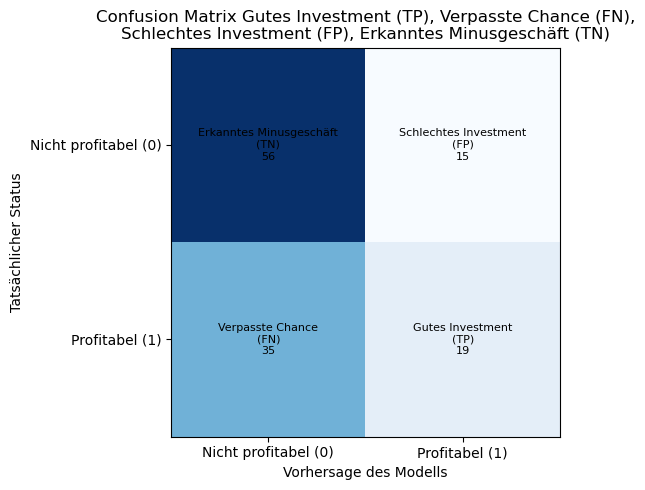

In [18]:
# --- ROC-AUC ---
roc_train = roc_auc_score(y_train, y_train_proba)
roc_test  = roc_auc_score(y_test,  y_test_proba)

print(f"ROC-AUC Train: {roc_train:.3f}")
print(f"ROC-AUC Test : {roc_test:.3f}\n")


# --- Klassifikationsmetriken ---
acc  = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec  = recall_score(y_test, y_test_pred)

print("Test-Metriken:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")


# --- Confusion-Matrix mit Business-Begriffen ---
cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap="Blues")


ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Tatsächlicher Status")


ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Nicht profitabel (0)", "Profitabel (1)"])
ax.set_yticklabels(["Nicht profitabel (0)", "Profitabel (1)"])

ax.set_title(
    "Confusion Matrix Gutes Investment (TP), "

    "Verpasste Chance (FN),\n"

    "Schlechtes Investment (FP), Erkanntes Minusgeschäft (TN)"
)

business_labels = [
    ["Erkanntes Minusgeschäft\n(TN)", "Schlechtes Investment\n(FP)"],
    ["Verpasste Chance\n(FN)", "Gutes Investment\n(TP)"]
]

for i in range(2):
    for j in range(2):
        text = f"{business_labels[i][j]}\n{cm[i, j]}"
        ax.text(
            j, i,
            text,
            ha="center",
            va="center",
            color="black",
            fontsize=8
        )

fig.tight_layout()
plt.show()

##  Diskussion von Overfitting und Underfitting

Dieses Modell lässt sich abhängig von den Hyperparametern wiefolgt einordnen:

- Ein **zu komplexer Baum** (sehr große `max_depth`, kleine `min_samples_leaf`) würde
  - die Trainingsdaten fast perfekt trennen (sehr hohe ROC-AUC/Accuracy im Training),
  - aber auf den Testdaten deutlich schlechter abschneiden → **Overfitting (hohe Varianz)**.

- Ein **zu einfacher Baum** (sehr kleine `max_depth`, große `min_samples_leaf`) würde
  - sowohl auf Trainings- als auch Testdaten eher schlechte Werte liefern,
  - weil die Modellkapazität nicht ausreicht, die Zusammenhänge abzubilden → **Underfitting (hoher Bias)**.

In diesem Modell haben wir versucht einen **Kompromiss** zu finden:

- `max_depth = 7` begrenzt die Komplexität des Baums.
- `min_samples_leaf = 40` sorgt dafür, dass Blätter nicht nur auf sehr wenigen Startups basieren.

betrachteten wir unsere Metriken für unsere gewählten Hyperparamater kommen wir zum Schluss:

ROC-AUC Train: 0.687  trennt im Training okay, aber nicht stark. Erkennt Muster aber nicht Trennungsscharf.

ROC-AUC Test : 0.579  trennt im Test kaum besser als Zufall. 

-> Differenz ROC-AUC Training/Test = 0,108  Mittelgroßer Unterschied zwischen Test und Trainingserfolg.

Accuracy : 0.600     60% Aller Startups korrekt Klassifiziert, okay aber nicht Gut wenn man die Risiken abwägt.

Precision: 0.559   Nur 55,9% der als profitablen hervorgesagten Startups waren korrekt. Viele False Positives und somit für Investoren  sehr gefährlich.

Recall   : 0.352     Das Modell erkennt gerade mal 35,2% der tatsächlich profitablen Startups im Test.

**Fazit**

Das Modell overfittet ein wenig, weil die Differenz zwischen Test und Training mittelgroß ist.
Gleichzeitig underfittet es, weil beide Werte insgesamt schlecht sind.

**Gründe**

-Der Datensatz enthält gerademal 500 Startups. Die einzelnen Kombinationen von Region, Industrie, etc. sind so gering dass das Modell nicht genug Muster finden kann.

-Gleichzeitig sind die Umstände der Startups, wie Trends (zB. AI), Wirtschaftsschwankungen oder einfach Startupeinzigartige Qualitäten im Datensatz ebenfalls nicht erfasst.

-Das Modell ist mit diesem Datensatz nicht praxistauglich.

## 4. Feature Importance des Decision Trees

Um das Modell besser erklären zu können (Explainable AI), wird die **Feature Importance** des Decision Trees ausgewertet.

- Sie zeigt, welche Features besonders stark zur Trennung der Klassen beitragen.
- So lassen sich fachliche Fragen beantworten wie:
  - Welche Rolle spielt der **Marktanteil**?
  - Wie wichtig sind **Finanzierungsrunden** oder **Kapital-Effizienz**?
  - Welche Branchen oder Regionen sind im Modell besonders relevant?

So kann Vertrauen zu den Investoren aufgebaut werden weil sie nicht auf eine Blackbox vertrauen müssen.
Gleichzeitig ermöglicht es ihnen festzustellen ob sie anders ihre Entscheidungen treffen als das Modell.

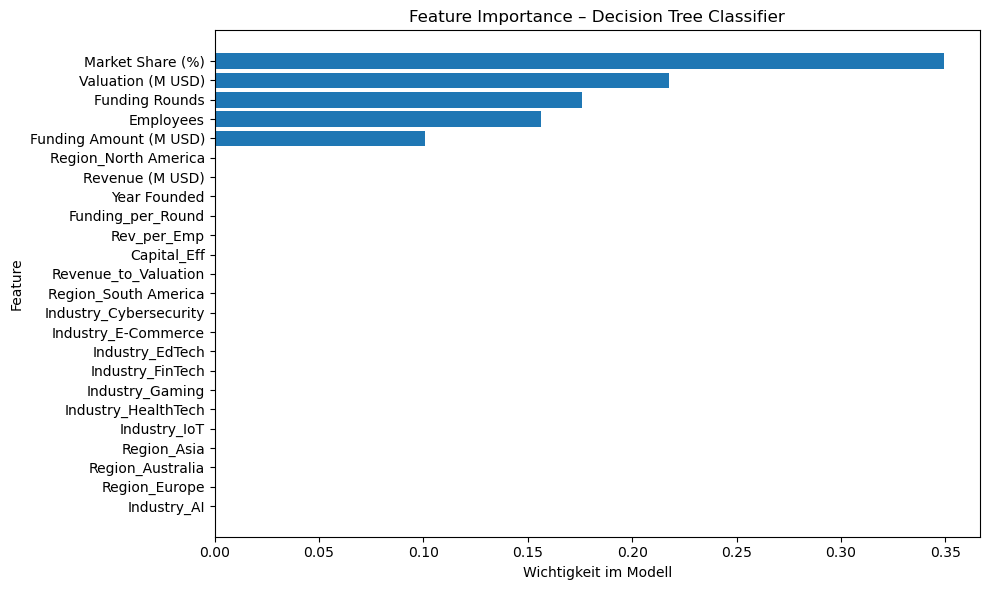

,Feature,Importance
5,Market Share (%),0.349184
2,Valuation (M USD),0.217628
0,Funding Rounds,0.176014
4,Employees,0.156354
1,Funding Amount (M USD),0.100821
21,Region_Europe,0.000000
22,Region_North America,0.000000
3,Revenue (M USD),0.000000
6,Year Founded,0.000000
7,Funding_per_Round,0.000000


In [19]:
# Zugriff auf das trainierte Baum-Modell und den One-Hot-Encoder
best_tree = pipe.named_steps["model"]
ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]

# Feature-Namen: numerische Features + One-Hot-Features
feature_names = num + list(ohe.get_feature_names_out(cat))
importances = best_tree.feature_importances_

imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=True)

plt.figure(figsize=(10, max(6, len(imp_df) * 0.25)))
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.xlabel("Wichtigkeit im Modell")
plt.ylabel("Feature")
plt.title("Feature Importance – Decision Tree Classifier")
plt.tight_layout()
plt.show()

imp_df.sort_values("Importance", ascending=False).head(10)

## Auswertung Feature-Importance und Modellkomplexität

An der **Feature-Importance** sieht man gut, wie komplex das Modell tatsächlich ist. Viele Features werden bei der Entscheidungsfindung gar nicht berücksichtigt, was sich negativ auf die **Genauigkeit** des Modells auswirken kann.  

Ein größerer **Datensatz** könnte dieses Problem abmildern, da das Modell mehr Beispiele hätte, um Muster zu lernen, und dadurch mehr Features sinnvoll nutzen könnte. Alternativ kann man auf leistungsfähigere Verfahren wie **Gradient Boosting** oder **Random Forests** zurückgreifen, die in der Regel robuster sind und komplexere Zusammenhänge besser abbilden.

Trotzdem ist es für Investoren auf jeden Fall sinvoll diesen Graphen zu sehen um entscheiden zu können ob er diesem Modell "vertrauen" kann.


# Teil 4: Kritische Reflexion & Geschäftsempfehlung

## 4.1 Geschäftsempfehlung

### 4.1.1 Übersetzung in Businness Sprache


**Man erhält als Ergebnis eine Tabelle, die eine beliebige Anzahl (TOP_K) Startups empfiehlt. Aber wie kommt das Modell zu diesen Empfehlungen und was genau sagt die Tabelle aus?**

#### 1. Datenvorverarbeitung und die Pipeline

Bevor das **Decision Tree Modell** trainiert werden kann, müssen die Rohdaten umfassend vorbereitet werden. Diese **Vorverarbeitung** wird in einer **Pipeline** gebündelt, um die einzelnen Schritte zu **standardisieren** und Fehler (wie Datenlecks) zu minimieren.

Die Pipeline umfasst die folgenden zentralen Schritte:

* **Säuberung und Feature Engineering:** Zunächst werden die Daten bereinigt. Anschließend werden neue Features geschaffen, indem zwei oder mehr bestehende Kennzahlen (z.B. Umsatz und Anzahl der Mitarbeiter) zu einer aussagekräftigeren Kennzahl kombiniert werden.
* **Skalierung Numerischer Daten:** Bei numerischen Daten wird eine **Min-Max-Skalierung** angewendet. Dies ist nötig, um den Einfluss von Kennzahlen unterschiedlicher Größenordnungen (z.B. "Market Share" und "Umsatz") im Modell gleich zu gewichten.
* **Kodierung Kategorischer Daten:** Die kategorischen Daten (Texte oder Label) werden mittels **One-Hot-Encoding** umgewandelt. Dabei werden die Kategorien in binäre (Nullen und Einsen) Vektoren überführt, die für den Computer lesbar und verarbeitbar sind.

#### 2. Der Decision Tree und die Entscheidungsfindung

Bei dem gewählten Algorithmus handelt es sich um einen **Decision Tree**. Dieser ist ein **Baum von Entscheidungsregeln**, der die Daten schrittweise teilt, um die Zielvariable vorherzusagen.

Das Modell **probiert verschiedenste Kombinationen** aus Features, Schwellenwerten und Abzweigungen aus, um am Ende den besten Baum zu finden. Sein Ziel ist es, die Zielvariable – in unserem Fall die **Profitabilität** – so präzise wie möglich zu bestimmen. Die Entscheidungsregeln sehen dabei wie folgt aus:

(Wenn Market Share > *x* **und** Funding Amount < *y*, **dann** ...)

#### 3. Interpretation der Ergebnis-Tabelle

Die daraus resultierende Empfehlungs-Tabelle enthält unter anderem die Spalte **`prob_profit`**.

* Diese Dezimalzahl gibt die vom Modell berechnete **Wahrscheinlichkeit** an, mit der das jeweilige Start-up profitabel ist.
* Ist diese Wahrscheinlichkeit (vom Modell) größer als 50 %, wird für die finale Vorhersage (**`y_test-pred`**) der Wert **1 (profitabel)** vergeben, andernfalls der Wert **0 (unprofitabel)**.


#### 4. Objektive Bewertung der Ergebnisse: Die Confusion Matrix

**Wie kann man die Modellergebnisse objektiv bewerten und die Qualität der Empfehlungen einschätzen?**

Zur objektiven Bewertung der Vorhersagegenauigkeit verwenden wir die **Confusion Matrix** (siehe 3.3). Sie bietet eine strukturierte Übersicht über die vier möglichen Vorhersage-Ergebnisse:

* **True Positive (TP):** Das Modell hat ein **gutes Investment** vorhergesagt, und es war in der Realität **tatsächlich gut**. (Korrekte Empfehlung)
* **False Positive (FP):** Das Modell hat ein **Investment empfohlen**, obwohl es in der Realität **schlecht war**. (Falsche, riskante Empfehlung)
* **True Negative (TN):** Das Modell hat ein **schlechtes Investment** erkannt, und es war in der Realität **tatsächlich schlecht**. (Korrekte Ablehnung)
* **False Negative (FN):** Das Modell hat ein **gutes Investment** **übersehen** (als schlecht erfasst), obwohl es in der Realität profitabel war. (Verpasste Chance)

#### 5. Fokus auf Risikominimierung

Zur Bewertung dieser vier Möglichkeiten gibt es verschiedene Metriken (Precision, Recall, F1-Score). Da uns die **Risikominimierung** besonders wichtig ist, liegt unser Hauptaugenmerk darauf, die **False Positives (FP)** zu begrenzen. Diese stellen jene Empfehlungen dar, die später Verluste verursachen könnten.




## 4.2 Weiterführende Fragen

## 4.2.1 Kritische Fragen 

#### **1. Datenqualität und Repräsentativität**
- **Wie repräsentativ ist der Datensatz?** Mit nur 500 Startups aus verschiedenen Branchen und Regionen: Bildet dieser Ausschnitt wirklich die globale Startup-Landschaft ab oder ist er systematisch verzerrt?
- **Warum gibt es keine fehlenden Werte?** Ist das ein Zeichen für hochqualitative Datenerfassung oder wurden Daten künstlich bereinigt bzw. ergänzt?
- **Survivorship Bias:** Fehlen gescheiterte Startups komplett im Datensatz? Wenn ja, wie verzerrt das unsere Gewichtung der unterschiedlichen Features?

#### **2. Zeitliche Dynamik**
- **Wie werden Kohorteneffekte berücksichtigt?** Startups aus dem Jahr 1990 vs. 2020 operieren in völlig unterschiedlichen Marktbedingungen (Dotcom-Blase, Finanzkrise, COVID-19, AI-Boom): Ist ein direkter Vergleich überhaupt sinnvoll?
- **Wann wurde die Profitabilität gemessen?** Ein 30 Jahre altes Startup hat andere Profitabilitätschancen als ein 3 Jahre altes: Fehlt hier eine zeitliche Normalisierung?
- **Wie dynamisch sind die Daten?** Werden aktuelle Markttrends erfasst oder ist der Datensatz veraltet?

#### **3. Modellleistung und Praktikabilität**
- **Warum ist die Modellperformance so schwach?** Mit nur 60% Accuracy und 35% Recall: Ist das Modell überhaupt besser als zufälliges Raten (50%)? Woran liegt das?
- **Sind die Features ausreichend?** Welche wichtigen Erfolgsfaktoren fehlen (Gründerteam-Erfahrung, Netzwerkeffekte, Technologie-Stack, Wettbewerbsintensität)?

#### **4. Kausalität vs. Korrelation**
- **Sind die identifizierten Zusammenhänge kausal?** Beispiel: Hoher Marktanteil → Profitabilität oder Profitabilität → ermöglicht Marktanteilsgewinn?
- **Selection Bias bei Finanzierung:** Erhalten bereits erfolgreiche Startups mehr Funding, oder führt mehr Funding zu einem Erfolg?

#### **5. Geschäftliche Anwendbarkeit**
- **Sind die Empfehlungen umsetzbar?** Sind die Empfehlungen für Investoren oder Gründer überhaupt konkret steuer- und umsetzbar?
- **Kosten-Nutzen-Verhältnis:** Was kostet es, ein False Positive (schlechtes Investment) vs. False Negative (verpasste Chance) zu haben? Sollte der Schwellenwert angepasst werden?
- **Wie verhält sich das Modell bei neuen Branchen?** EdTech/FinTech dominieren den Datensatz – funktioniert das Modell auch für Web3, Quantum Computing oder Biotech?

#### **6. Strategische Überlegungen**
- **Selbsterfüllende Prophezeiung:** Wenn alle Investoren dasselbe Modell nutzen – führt das zu Herdenverhalten und Blasenbildung in bestimmten Sektoren?
- **Qualitative Faktoren:** Wie bewerten wir Teamqualität, Vision, Anpassungsfähigkeit – Faktoren, die oft erfolgsent­scheidend sind, aber nicht im Datensatz erscheinen?


## 4.2.2 Nächste Schritte für eine erweiterte Analyse

#### **Phase 1: Datenakquisition und -erweiterung**
1. **Größeren Datensatz beschaffen**
   - Mindestens 5.000-10.000 Startups für robustere Muster
   - Inklusive gescheiterter Startups zur Vermeidung von Survivorship Bias
   - Mehrere Zeitpunkte pro Startup, statt nur Momentaufnahmen

2. **Zusätzliche Features integrieren**
   - **Gründer-Features:** Ausbildung, Vorerfahrung, Team-Diversität
   - **Qualitative Metriken:** Produkt-Market-Fit Indikatoren, Customer Satisfaction Scores
   - **Makroökonomische Variablen:** GDP-Wachstum, Zinssätze, Funding-Volumen pro Jahr/Region
   - **Wettbewerbs-Metriken:** Anzahl Konkurrenten, Marktkonzentration, Eintrittsbarrieren
   - **Technologie-Indikatoren:** Patente, Tech-Stack-Modernität

3. **Externe Datenquellen einbinden**
   - Social Media Sentiment (Twitter bzw. X/LinkedIn) für Brand Perception
   - News-Artikel und PR-Events für Momentum-Indikatoren

#### **Phase 2: Erweiterte Modellierungstechniken**
4. **Ensemble-Methoden testen**
   - **Random Forest:** Reduziert Overfitting, bessere Performance bei kleinen Datensätzen
   - **Gradient Boosting:** State-of-the-Art für strukturierte Daten
   - **Stacking:** Kombiniere Decision Trees, Logistische Regression, Neuronales Netzwerk

5. **Survival Analysis statt binärer Klassifikation**
   - Berücksichtigt Zeit-bis-Event und Zensierung (rechtstrunkierte Daten)
   - Liefert realistische Zeitprognosen statt nur binärer Labels

6. **Kausalinferenz-Methoden anwenden**
   - **Propensity Score Matching:** Kausale Effekte von Funding-Höhe/Zeitpunkt isolieren
   - **Difference-in-Differences:** Effekte von Interventionen (z.B. Accelerator-Programme) messen

#### **Phase 3: Feature Engineering und Interaktionen**
7. **Zeitabhängige Features kreieren**
   - **Startup-Alter bei Messung:** Normalisiere Metriken nach Unternehmensalter
   - **Wachstumsraten:** YoY-Veränderung statt absoluter Werte (Revenue-Wachstum, Mitarbeiter-Wachstum)
   - **Momentum-Indikatoren:** Beschleunigung des Wachstums

8. **Branchen- und regionsspezifische Modelle**
   - Separate Modelle für FinTech vs. HealthTech vs. CleanTech (unterschiedliche Erfolgsfaktoren)
   - Regionale Modelle für spezifische Ökosysteme (Silicon Valley vs. Berlin vs. ...)

9. **Interaktionseffekte modellieren**
   - Funding × Branche: Ist mehr Funding in Investitions-intensiven Branchen wichtiger?
   - Market Share × Employees: Effizienzgewinne durch Skalierung?

#### **Phase 4: Modellvalidierung und Robustheit**
10. **Cross-Validation und Hyperparameter-Tuning**
    - Grid Search / Random Search / Bayesian Optimization für optimale Hyperparameter
    - Nested Cross-Validation zur Vermeidung von Overfitting beim Tuning

11. **Out-of-Time Validation**
    - Trainiere auf 1990-2015, teste auf 2016-2022
    - Prüft Generalisierung auf zukünftige Startups (realistischer für Investoren)

12. **Sensitivitätsanalyse und Stress-Tests**
    - Wie reagiert das Modell auf extreme Szenarien (Wirtschaftskrisen, Hype-Zyklen)?
    - Robustheit gegenüber Ausreißern und Missing Data testen

#### **Phase 5: Geschäftliche Operationalisierung**
13. **Kosten-Nutzen-Optimierung**
    - **Custom Loss Functions:** Gewichte False Positives (verlorenes Kapital) vs. False Negatives (verpasste Returns)
    - **Threshold-Optimierung:** Finde optimalen Decision Threshold basierend auf Investment-Strategie
    - **Portfolio-Optimierung:** Multi-Objective Optimization (Erwartungswert vs. Risiko)

#### **Phase 6: Erweiterte Forschungsfragen**
14. **Deep Dive in Untergruppen**
    - Separate Analysen für Early-Stage vs. Late-Stage
    - B2B vs. B2C Geschäftsmodelle – unterschiedliche Erfolgsfaktoren?
    - Bootstrapped vs. VC-backed Startups

15. **Netzwerkanalyse**
    - Investor-Netzwerke: Haben gut vernetzte VCs bessere Portfolio-Performance?
    - Co-Funding-Patterns: Welche Investor-Kombinationen sind erfolgreich?

16. **Natural Language Processing (NLP)**
    - Analyse von Pitch-Decks, Business-Plan-Texten → Erfolgs-Prädiktoren?
    - Analyse von Founder-Interviews/Tweets
    - Job-Posting-Analyse → Indikator für Wachstum?

# **Ende**

